# IN THIS CODE, WE ARE USING COL DATASET THAT HAS VARIOUS FACTORS x1,x2........ FOR EX: PRICE OF 1KG APPLE, 1BHK RENT, PRICE OF PETROL ETC, AND WILL TAKE USER INPUTS AND THEN USING THESE VALUES(WHICH ARE OF 2022) CALCULATE COST OF LIVING FOR YEAR 2022, THEN USING INFALTION DATASET, BACKTRACK TO 2000 AND THEN PREDICT FUTURE VALUES(EX: 2027)

# IMPORTING LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# READING DATASET col_v2(VARIOUS FACTORS AFFECTING COST OF LIVING FOR YEAR 2022) AND DROPPING UNWANTED COLUMNS

In [4]:
df = pd.read_excel('world_dataset.xlsx')
df

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55
0,Herat,Afghanistan,1.69,6.21,2.82,2.26,1.80,0.56,0.40,0.11,...,22.60,19.77,62.150000,39.550,112.990000,79.100,480.780000,248.42000,152.540,10.30
1,Kabul,Afghanistan,1.69,5.65,3.11,2.26,1.80,0.93,0.23,0.13,...,30.51,36.16,108.920000,64.970,228.810000,146.890,694.920000,355.93000,195.860,13.88
2,Kruje,Albania,4.51,29.29,4.35,1.80,1.80,1.35,1.35,0.72,...,76.27,84.45,117.140000,90.110,225.280000,180.220,450.550000,550.41625,333.410,4.44
3,Gjirokaster,Albania,3.60,22.53,2.11,1.35,1.31,0.95,0.85,0.43,...,52.69,63.22,210.750000,158.060,474.190000,316.120,1053.750000,632.25000,526.870,5.25
4,Gramsh,Albania,4.51,22.53,3.15,1.80,1.80,1.24,1.15,0.53,...,47.17,100.69,208.415000,125.067,366.069000,219.701,928.021111,550.41625,379.405,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,Kafue,Zambia,3.00,18.37,3.17,1.22,1.50,1.81,0.88,0.47,...,90.18,105.64,262.010000,168.400,832.640000,439.960,10763.910000,1041.26000,396.940,26.00
3112,Chitungwiza,Zimbabwe,7.00,40.00,6.00,1.30,2.00,2.20,0.72,0.47,...,40.62,51.43,196.586667,209.665,534.723333,426.390,1122.050000,1041.26000,311.110,15.00
3113,Masvingo,Zimbabwe,7.00,40.00,6.00,1.30,2.00,2.20,0.72,0.47,...,40.62,51.43,60.000000,209.665,300.000000,150.000,1122.050000,582.52000,311.110,15.00
3114,Harare,Zimbabwe,7.00,40.00,6.00,1.30,2.00,2.20,0.72,0.47,...,40.62,51.43,296.430000,296.000,887.500000,762.500,1344.100000,1500.00000,272.220,15.00


In [5]:
df_try1 = df.copy()
pd.set_option('display.max_columns', None)
df_try1

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55
0,Herat,Afghanistan,1.69,6.21,2.82,2.26,1.80,0.56,0.40,0.11,0.38,0.40,1.36,1.40,2.54,2.15,4.52,0.51,1.13,0.68,0.37,0.38,0.24,0.23,0.23,11.30,1.13,1.58,2.26,0.230000,1.69,1.13,3.39,0.68,6779.66,26440.68,56.50,0.04,112.99,9.79,2.54,16.95,1491.53,16.95,76.27,22.60,19.77,62.150000,39.550,112.990000,79.100,480.780000,248.42000,152.540,10.30
1,Kabul,Afghanistan,1.69,5.65,3.11,2.26,1.80,0.93,0.23,0.13,0.60,0.23,1.23,1.20,3.39,2.53,5.39,0.73,0.92,1.11,0.49,0.30,0.23,0.23,0.33,11.30,0.87,1.58,1.86,0.230000,1.13,0.56,2.26,0.89,6779.66,11299.43,31.99,0.04,715.63,13.56,2.54,25.99,1491.53,18.08,17.36,30.51,36.16,108.920000,64.970,228.810000,146.890,694.920000,355.93000,195.860,13.88
2,Kruje,Albania,4.51,29.29,4.35,1.80,1.80,1.35,1.35,0.72,1.08,0.72,1.26,2.29,4.73,4.42,7.66,0.99,1.79,1.17,0.59,0.54,0.54,0.63,0.50,8.11,1.00,1.35,2.97,0.900000,1.80,1.35,4.51,2.13,18022.08,19904.00,55.70,0.27,15.95,27.03,6.67,54.07,3410.46,46.85,35.59,76.27,84.45,117.140000,90.110,225.280000,180.220,450.550000,550.41625,333.410,4.44
3,Gjirokaster,Albania,3.60,22.53,2.11,1.35,1.31,0.95,0.85,0.43,0.97,0.53,1.26,1.90,5.52,4.05,7.49,0.96,1.16,1.03,0.88,0.61,0.60,0.63,0.47,3.88,0.53,0.89,2.88,0.430000,2.70,1.35,13.52,1.73,17120.97,15919.50,89.57,0.20,15.81,14.98,2.70,88.61,1922.35,31.61,26.34,52.69,63.22,210.750000,158.060,474.190000,316.120,1053.750000,632.25000,526.870,5.25
4,Gramsh,Albania,4.51,22.53,3.15,1.80,1.80,1.24,1.15,0.53,1.27,0.51,0.90,2.24,4.51,1.80,6.31,0.63,1.08,0.67,0.54,0.36,0.49,0.49,0.45,4.51,0.72,1.08,2.88,0.541111,1.80,1.80,4.51,1.53,16219.87,19824.28,63.49,0.08,13.02,27.03,4.21,104.17,1603.96,22.53,26.79,47.17,100.69,208.415000,125.067,366.069000,219.701,928.021111,550.41625,379.405,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,Kafue,Zambia,3.00,18.37,3.17,1.22,1.50,1.81,0.88,0.47,1.34,0.95,2.00,1.73,9.11,4.18,5.30,2.48,1.49,2.51,1.16,1.23,1.59,1.22,0.92,4.90,0.99,1.26,2.66,1.660000,3.00,0.62,9.19,1.36,8593.28,6444.46,140.69,0.07,103.74,23.82,2.00,171.24,14061.39,12.66,31.12,90.18,105.64,262.010000,168.400,832.640000,439.960,10763.910000,1041.26000,396.940,26.00
3112,Chitungwiza,Zimbabwe,7.00,40.00,6.00,1.30,2.00,2.20,0.72,0.47,1.61,1.00,1.51,1.81,8.08,4.91,4.73,2.90,1.52,1.89,1.39,1.65,1.35,0.76,0.92,8.00,1.18,2.15,2.00,1.000000,5.00,2.00,10.00,1.25,25000.00,27666.67,60.67,0.21,118.75,30.00,6.50,288.89,7087.50,17.78,20.00,40.62,51.43,196.586667,209.665,534.723333,426.390,1122.050000,1041.26000,311.110,15.00
3113,Masvingo,Zimbabwe,7.00,40.00,6.00,1.30,2.00,2.20,0.72,0.47,1.61,1.00,1.51,1.81,8.08,4.91,4.73,2.90,1.52,1.89,1.39,1.65,1.35,0.76,0.92,8.00,1.18,2.15,2.00,0.666667,5.00,2.00,10.00,1.50,25000.00,27666.67,60.67,0.21,118.75,30.00,6.50,288.89,7087.50,17.78,20.00,40.62,51.43,60.000000,209.665,300.000000,150.000,1122.050000,582.52000,311.110,15.00
3114,Harare,Zimbabwe,7.00,40.00,6.00,1.30,2.00,2.20,0.72,0.47,1.61,1.00,1.51,1.81,8.08,4.91,4.73,2.90,1.52,1.89,1.39,1.65,1.35,0.76,0.92,8.00,1.18,2.15,2.00,0.500000,5.00,2.00,10.00,1.50,25000.00,27666.67,60.67,0.21,118.75,35.00,6.50,288.89,7087.50,17.78,20.00,40.62,51.43,296.430000,296.000,887.500000,762.500,1344.100000,1500.00000,272.220,15.00


# TAKING USER INPUTS BY ASKING VARIOUS QUESTIONS AND STORING THEM INTO VARIOUS VARIABLES(BASIC PYTHON CODE) AND CALCULATING USING VARIOUS COLUMNS 

## TAKING INPUT

In [6]:
# TOTAL MEMBERS
no_of_adult = int(input("Enter number of adults(excluding university students) you want to predict for: "))
preschoolers = int(input("No of children in preschool:"))
schoolers = int(input("No of children in primary-secondary:"))
universitites = int(input("No of children in university:"))
no_of_infant = int(input("Enter number of children below 2 years you want to predict for: "))
total_members = no_of_adult + universitites + 0.75*schoolers + 0.5*preschoolers

Enter number of adults(excluding university students) you want to predict for: 1
No of children in preschool:1
No of children in primary-secondary:1
No of children in university:1
Enter number of children below 2 years you want to predict for: 1


In [7]:
# EATING OUT
res_level = input("Do you prefer inexpensive restaurants or mid-range: ").lower()
eat_out = int(input("How often do you eat out in a month: "))
if res_level == 'inexpensive':
    res_cost = df_try1['x1'] + df_try1['x3']
elif res_level == 'mid-range':
    res_cost = (df_try1['x2'])/2 + df_try1['x3']
else:
    res_level = 'invalid'

eat_out_cost = (eat_out/2)*res_cost
total_eat_out_cost = eat_out_cost * total_members

Do you prefer inexpensive restaurants or mid-range: mid-range
How often do you eat out in a month: 1


In [8]:
# ALCOHOL
alcohol_consumption = 0
alcohol = input("What do you prefer, local beer or imported beer or wine or none alcohol? ").lower()
alcohol_consumers = int(input("How many in your family consume alcohol? "))
if alcohol != 'none':
    alcohol_consumption = int(input("How often do you drink in a month: "))
    if alcohol == 'local beer':
        alcohol_cost = eat_out * df_try1['x4'] + alcohol_consumption * df_try1['x25']
    elif alcohol == 'imported beer':
        alcohol_cost = eat_out * df_try1['x5'] + alcohol_consumption * df_try1['x26']
    elif alcohol == 'wine':
        alcohol_cost = (eat_out+alcohol_consumption) * df_try1['x24']
elif alcohol == 'none':
    alcohol_cost = 0
total_alcohol_cost = alcohol_cost * alcohol_consumers

What do you prefer, local beer or imported beer or wine or none alcohol? none
How many in your family consume alcohol? 0


In [9]:
# CAFE 
cafe = int(input("How often do you go out to cafes? "))
coffee_cost = total_members * cafe * df_try1['x6']

How often do you go out to cafes? 1


In [10]:
# SMOKING
smoke = input("Do you smoke?")
if smoke=='yes':
    smoke_freq = input("How often you smoke:")
    if smoke_freq == "Once daily":
        if total_members > 1:
            smokers = int(input("How many people smoke in your family?"))
            smoke_cost = smokers * (df_try1['x27']*1.5) 
        else :
            smoke_cost = df_try1['x27']*1.5
    elif smoke_freq == "Once a week":
        if total_members > 1:
            smokers = int(input("How many people smoke in your family?"))
            smoke_cost = smokers * (df_try1['x27']/5) 
        else :
            smoke_cost = df_try1['x27']/5
    elif smoke_freq == "2-3 times a week":
        if total_members > 1:
            smokers = int(input("How many people smoke in your family?"))
            smoke_cost = smokers * (df_try1['x27']/2) 
        else :
            smoke_cost = df_try1['x27']/2
    elif smoke_freq == "Once a month":
        if total_members > 1:
            smokers = int(input("How many people smoke in your family?"))
            smoke_cost = smokers * (df_try1['x27']/20) 
        else :
            smoke_cost = df_try1['x27']/20
    elif smoke_freq == "More than once a day":
        if total_members > 1:
            smokers = int(input("How many people smoke in your family?"))
            smoke_cost = smokers * (df_try1['x27']*3) 
        else :
             smoke_cost = df_try1['x27']*3
elif smoke=='no':
    smoke_cost = 0

Do you smoke?no


In [11]:
# TRANSPORT
no_of_cars = int(input("How many cars do yo own:"))
no_of_bikes = int(input("How many bikes do you own:"))
travel_distance_car = int(input("How much does your family travel each week on average in car:"))
travel_distance_bike = int(input("How much does your family travel each week on average on bike:"))

total_petrol_car = travel_distance_car/12.5
total_petrol_bike = travel_distance_bike/40
total_petrol = total_petrol_car+total_petrol_bike
petrol_cost = total_petrol * df_try1['x33']

taxi = int(input("How often using taxi per month:"))
taxi_cost = taxi * df_try1['x31'] * 5
travel_cost = petrol_cost + taxi_cost

How many cars do yo own:1
How many bikes do you own:1
How much does your family travel each week on average in car:1
How much does your family travel each week on average on bike:1
How often using taxi per month:1


In [12]:
# GYM + MOVIE
gym = int(input("How many members in your family go to gym?"))
movie = int(input("How often watching movies in cinema?"))

gym_cost = gym * df_try1['x39']
movie_cost = movie * df_try1['x41'] * total_members

leisure_cost = gym_cost + movie_cost 

How many members in your family go to gym?1
How often watching movies in cinema?1


In [13]:
# EDUCATION FOR KIDS
preschool_cost = preschoolers * df_try1['x42']
school_cost = schoolers * (df_try1['x43']/12)
university_cost = universitites * (df_try1['x43']*1.5/12)
education_cost = preschool_cost + school_cost + university_cost

In [14]:
#BUYING CAR
buy_car = input("Would you like to buy a car (yes/no): ")
buy_car_years = int(input("In how many years? "))

if buy_car.lower() == 'yes':
    car_type = input("What type of car? (Sedan, Hatchback, SUV): ").lower()
    if car_type == 'hatchback':
        total_car_price = df_try1['x34']
    elif car_type == 'sedan':
        total_car_price = df_try1['x35']
    elif car_type == 'suv':
        price_diff_ratio = (df_try1['x35'] - df_try1['x34']) / df_try1['x34']
        total_car_price = df_try1['x35'] + (price_diff_ratio * df_try1['x35'])
    else:
        print("Invalid car type entered.")
        total_car_price = 0
    save_car_amount = total_car_price / (buy_car_years * 12)
else:
    save_car_amount = 0


Would you like to buy a car (yes/no): no
In how many years? 0


In [15]:
# RENT
bhk = int(input("Would you a prefer a 1bhk, 2bhk or 3bhk house?"))
location = input("Would you prefer a house in city center or outskirts?")
if location == 'center':
    if bhk==1:
        rent = df_try1['x48']
    elif bhk==3:
        rent = df_try1['x50']
    elif bhk==2:
        rent = (df_try1['x48']+df_try1['x50'])/2
elif location =='outskirts':
    if bhk==1:
        rent = df_try1['x49']
    elif bhk==3:
        rent = df_try1['x51']
    elif bhk==2:
        rent = (df_try1['x49']+df_try1['x51'])/2

Would you a prefer a 1bhk, 2bhk or 3bhk house?1
Would you prefer a house in city center or outskirts?center


In [16]:
# BASIC HOUSE AMENITIES
if bhk==1:
    amenities_cost = df_try1['x36']/3
elif bhk==2:
    amenities_cost = (df_try1['x36']/3)*2
elif bhk==3:
    amenities_cost = df_try1['x36']

In [17]:
# BUYING HOUSE
save_house = input("Would you like to save amount for buying a house in future?")
save_house_years = int(input("How many years before you buy?"))

if save_house == 'yes':
    if bhk == 1:
        if location == 'center':
            total_price = df_try1['x52'] * 30
            save_house_amount = total_price / (save_house_years * 12)
        elif location =='outskirts':
            total_price = df_try1['x53'] * 30
            save_house_amount = total_price / (save_house_years * 12)
    elif bhk == 2:
        if location == 'center':
            total_price = df_try1['x52'] * 60
            save_house_amount = total_price / (save_house_years * 12)
        elif location =='outskirts':
            total_price = df_try1['x53'] * 60
            save_house_amount = total_price / (save_house_years * 12)
    elif bhk == 3:
        if location == 'center':
            total_price = df_try1['x52'] * 90
            save_house_amount = total_price / (save_house_years * 12)
        elif location =='outskirts':
            total_price = df_try1['x53'] * 90
            save_house_amount = total_price / (save_house_years * 12)
else:
   save_house_amount=0

Would you like to save amount for buying a house in future?no
How many years before you buy?0


In [18]:
# INTERNET COST 
internet_cost = df_try1['x38'] + total_members * df_try1['x38']

In [19]:
# CALLING COST
call_cost = df_try1['x37'] * 200 * (no_of_adult + universitites)

In [20]:
# CUISINE
food_pref = input("veg or non-veg?")
cuisine =  input("What type of cuisine? Indian, American, Arabic, etc.")

if cuisine == 'Indian':
    if food_pref == 'veg':
        rice_cost = df_try1['x11'] * 6
        bread_cost = df_try1['x10'] * 15
        cheese_cost = df_try1['x13']
        fruit_vegetable_cost = df_try1['x16'] * 4 + df_try1['x17'] * 4 + df_try1['x18'] * 4 + df_try1['x19'] * 5 + df_try1['x20'] * 5 + df_try1['x21'] * 3 + df_try1['x22']
        milk_cost = df_try1['x9'] * 10
        softdrink_cost = df_try1['x7'] * 3
        total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost 
    elif food_pref == 'non-veg':
        rice_cost = df_try1['x11'] * 6
        bread_cost = df_try1['x10'] * 15
        cheese_cost = df_try1['x13']
        fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
        milk_cost = df_try1['x9'] * 10
        softdrink_cost = df_try1['x7'] * 3
        egg_cost = df_try1['x12'] * 3
        meat_cost = df_try1['x14'] * 6 + df_try1['x15'] * 6  
        total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
        
elif cuisine == 'Arabic':
    rice_cost = df_try1['x11'] * 7
    bread_cost = df_try1['x10'] * 15
    cheese_cost = df_try1['x13']
    fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
    milk_cost = df_try1['x9'] * 10
    softdrink_cost = df_try1['x7'] * 3
    egg_cost = df_try1['x12'] * 5
    meat_cost = df_try1['x14'] * 7 + df_try1['x15'] * 7
    total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
    
elif cuisine == 'American':
    rice_cost = df_try1['x11'] * 3
    bread_cost = df_try1['x10'] * 15
    cheese_cost = df_try1['x13'] * 1.5
    fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
    milk_cost = df_try1['x9'] * 10
    softdrink_cost = df_try1['x7'] * 6
    egg_cost = df_try1['x12'] * 5
    meat_cost = df_try1['x14'] * 8 + df_try1['x15'] * 8
    total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost

elif cuisine == 'English':
    rice_cost = df_try1['x11'] * 5
    bread_cost = df_try1['x10'] * 15
    cheese_cost = df_try1['x13'] * 1
    fruit_vegetable_cost = df_try1['x16'] * 4 + df_try1['x17'] * 4 + df_try1['x18'] * 4 + df_try1['x19'] * 5 + df_try1['x20'] * 5 + df_try1['x21'] * 3 + df_try1['x22']
    milk_cost = df_try1['x9'] * 10
    softdrink_cost = df_try1['x7'] * 6
    egg_cost = df_try1['x12'] * 5
    meat_cost = df_try1['x14'] * 8 + df_try1['x15'] * 8
    total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost

elif cuisine == 'Italian':
    bread_cost = df_try1['x10'] * 20
    cheese_cost = df_try1['x13'] * 1.5
    fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
    milk_cost = df_try1['x9'] * 8
    softdrink_cost = df_try1['x7'] * 4
    egg_cost = df_try1['x12'] * 2
    meat_cost = df_try1['x14'] * 6 + df_try1['x15'] * 6    
    total_food_cost = bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
   
elif cuisine == 'Japanese':
    rice_cost = df_try1['x11'] * 5
    cheese_cost = df_try1['x13'] * 1
    fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
    milk_cost = df_try1['x9'] * 8
    softdrink_cost = df_try1['x7'] * 4
    egg_cost = df_try1['x12'] * 2
    meat_cost = df_try1['x14'] * 7 + df_try1['x15'] * 7
    total_food_cost = rice_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost

elif cuisine == 'Mexican':
    bread_cost = df_try1['x10'] * 20
    cheese_cost = df_try1['x13'] * 1
    fruit_vegetable_cost = df_try1['x16'] * 4 + df_try1['x17'] * 4 + df_try1['x18'] * 4 + df_try1['x19'] * 5 + df_try1['x20'] * 5 + df_try1['x21'] * 3 + df_try1['x22']
    milk_cost = df_try1['x9'] * 8
    softdrink_cost = df_try1['x7'] * 4
    egg_cost = df_try1['x12'] * 3
    meat_cost = df_try1['x14'] * 6 + df_try1['x15'] * 6
    total_food_cost = bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
   
elif cuisine == 'French':
    bread_cost = df_try1['x10'] * 20
    cheese_cost = df_try1['x13'] * 1.5
    fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
    milk_cost = df_try1['x9'] * 8
    softdrink_cost = df_try1['x7'] * 4
    egg_cost = df_try1['x12'] * 3
    meat_cost = df_try1['x14'] * 7 + df_try1['x15'] * 7
    total_food_cost = bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
    
elif cuisine == 'Thai':
    rice_cost = df_try1['x11'] * 6
    cheese_cost = df_try1['x13'] * 1
    fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
    milk_cost = df_try1['x9'] * 8
    softdrink_cost = df_try1['x7'] * 4
    egg_cost = df_try1['x12'] * 2
    meat_cost = df_try1['x14'] * 6 + df_try1['x15'] * 6  
    total_food_cost = rice_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost
   
elif cuisine == 'Chinese':
    rice_cost = df_try1['x11'] * 7
    bread_cost = df_try1['x10'] * 10
    cheese_cost = df_try1['x13'] * 1
    fruit_vegetable_cost = df_try1['x16'] * 3 + df_try1['x17'] * 3 + df_try1['x18'] * 3 + df_try1['x19'] * 4 + df_try1['x20'] * 4 + df_try1['x21'] * 2.5 + df_try1['x22']
    milk_cost = df_try1['x9'] * 10
    softdrink_cost = df_try1['x7'] * 6
    egg_cost = df_try1['x12'] * 2
    meat_cost = df_try1['x14'] * 7 + df_try1['x15'] * 7
    total_food_cost = rice_cost + bread_cost + cheese_cost + fruit_vegetable_cost + milk_cost + softdrink_cost + egg_cost + meat_cost

final_total_food_cost = total_food_cost * total_members

        

veg or non-veg?veg
What type of cuisine? Indian, American, Arabic, etc.Indian


In [21]:
total_col = total_eat_out_cost + total_alcohol_cost + coffee_cost + smoke_cost + travel_cost + leisure_cost + education_cost + save_car_amount + rent + amenities_cost + save_house_amount + call_cost + final_total_food_cost




## MAKING A NEW COLUMNS 'COL_2022' THAT HAS THE total_col VALUE FOR YEAR 2022 FOR ALL CITIES

In [48]:
# city = input("Enter city:")

In [22]:
df_try3 = df_try1.copy()

In [23]:
# city_rows = df_try1['city'] == city
        
# df_try1.loc[city_rows, 'COL_2022'] = total_col
# df_try3 = df_try1[df_try1['city']==city]

df_try3['COL_2022']=total_col

In [24]:
df_try3

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,COL_2022
0,Herat,Afghanistan,1.69,6.21,2.82,2.26,1.80,0.56,0.40,0.11,0.38,0.40,1.36,1.40,2.54,2.15,4.52,0.51,1.13,0.68,0.37,0.38,0.24,0.23,0.23,11.30,1.13,1.58,2.26,0.230000,1.69,1.13,3.39,0.68,6779.66,26440.68,56.50,0.04,112.99,9.79,2.54,16.95,1491.53,16.95,76.27,22.60,19.77,62.150000,39.550,112.990000,79.100,480.780000,248.42000,152.540,10.30,575.843275
1,Kabul,Afghanistan,1.69,5.65,3.11,2.26,1.80,0.93,0.23,0.13,0.60,0.23,1.23,1.20,3.39,2.53,5.39,0.73,0.92,1.11,0.49,0.30,0.23,0.23,0.33,11.30,0.87,1.58,1.86,0.230000,1.13,0.56,2.26,0.89,6779.66,11299.43,31.99,0.04,715.63,13.56,2.54,25.99,1491.53,18.08,17.36,30.51,36.16,108.920000,64.970,228.810000,146.890,694.920000,355.93000,195.860,13.88,629.349075
2,Kruje,Albania,4.51,29.29,4.35,1.80,1.80,1.35,1.35,0.72,1.08,0.72,1.26,2.29,4.73,4.42,7.66,0.99,1.79,1.17,0.59,0.54,0.54,0.63,0.50,8.11,1.00,1.35,2.97,0.900000,1.80,1.35,4.51,2.13,18022.08,19904.00,55.70,0.27,15.95,27.03,6.67,54.07,3410.46,46.85,35.59,76.27,84.45,117.140000,90.110,225.280000,180.220,450.550000,550.41625,333.410,4.44,1299.554692
3,Gjirokaster,Albania,3.60,22.53,2.11,1.35,1.31,0.95,0.85,0.43,0.97,0.53,1.26,1.90,5.52,4.05,7.49,0.96,1.16,1.03,0.88,0.61,0.60,0.63,0.47,3.88,0.53,0.89,2.88,0.430000,2.70,1.35,13.52,1.73,17120.97,15919.50,89.57,0.20,15.81,14.98,2.70,88.61,1922.35,31.61,26.34,52.69,63.22,210.750000,158.060,474.190000,316.120,1053.750000,632.25000,526.870,5.25,1046.434775
4,Gramsh,Albania,4.51,22.53,3.15,1.80,1.80,1.24,1.15,0.53,1.27,0.51,0.90,2.24,4.51,1.80,6.31,0.63,1.08,0.67,0.54,0.36,0.49,0.49,0.45,4.51,0.72,1.08,2.88,0.541111,1.80,1.80,4.51,1.53,16219.87,19824.28,63.49,0.08,13.02,27.03,4.21,104.17,1603.96,22.53,26.79,47.17,100.69,208.415000,125.067,366.069000,219.701,928.021111,550.41625,379.405,4.00,938.726692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,Kafue,Zambia,3.00,18.37,3.17,1.22,1.50,1.81,0.88,0.47,1.34,0.95,2.00,1.73,9.11,4.18,5.30,2.48,1.49,2.51,1.16,1.23,1.59,1.22,0.92,4.90,0.99,1.26,2.66,1.660000,3.00,0.62,9.19,1.36,8593.28,6444.46,140.69,0.07,103.74,23.82,2.00,171.24,14061.39,12.66,31.12,90.18,105.64,262.010000,168.400,832.640000,439.960,10763.910000,1041.26000,396.940,26.00,3806.720092
3112,Chitungwiza,Zimbabwe,7.00,40.00,6.00,1.30,2.00,2.20,0.72,0.47,1.61,1.00,1.51,1.81,8.08,4.91,4.73,2.90,1.52,1.89,1.39,1.65,1.35,0.76,0.92,8.00,1.18,2.15,2.00,1.000000,5.00,2.00,10.00,1.25,25000.00,27666.67,60.67,0.21,118.75,30.00,6.50,288.89,7087.50,17.78,20.00,40.62,51.43,196.586667,209.665,534.723333,426.390,1122.050000,1041.26000,311.110,15.00,2487.781250
3113,Masvingo,Zimbabwe,7.00,40.00,6.00,1.30,2.00,2.20,0.72,0.47,1.61,1.00,1.51,1.81,8.08,4.91,4.73,2.90,1.52,1.89,1.39,1.65,1.35,0.76,0.92,8.00,1.18,2.15,2.00,0.666667,5.00,2.00,10.00,1.50,25000.00,27666.67,60.67,0.21,118.75,30.00,6.50,288.89,7087.50,17.78,20.00,40.62,51.43,60.000000,209.665,300.000000,150.000,1122.050000,582.52000,311.110,15.00,2351.220833
3114,Harare,Zimbabwe,7.00,40.00,6.00,1.30,2.00,2.20,0.72,0.47,1.61,1.00,1.51,1.81,8.08,4.91,4.73,2.90,1.52,1.89,1.39,1.65,1.35,0.76,0.92,8.00,1.18,2.15,2.00,0.500000,5.00,2.00,10.00,1.50,25000.00,27666.67,60.67,0.21,118.75,35.00,6.50,288.89,7087.50,17.78,20.00,40.62,51.43,296.430000,296.000,887.500000,762.500,1344.100000,1500.00000,272.220,15.00,2592.650833


## EXTRACTING ONLY CITY, COUNTRY AND COL_2022 FROM THE DATASET

In [25]:
selected_columns = ['city', 'country', 'COL_2022']

df_try3backtrack = df_try3[selected_columns]
df_try3backtrack

,city,country,COL_2022
0,Herat,Afghanistan,575.843275
1,Kabul,Afghanistan,629.349075
2,Kruje,Albania,1299.554692
3,Gjirokaster,Albania,1046.434775
4,Gramsh,Albania,938.726692
...,...,...,...
3111,Kafue,Zambia,3806.720092
3112,Chitungwiza,Zimbabwe,2487.781250
3113,Masvingo,Zimbabwe,2351.220833
3114,Harare,Zimbabwe,2592.650833


# READING THE INFLATION DATASET OF INDIA WHICH HAS INDIA'S INFLATION RATES FROM 1970-2022

In [26]:
# import pandas as pd

# Read the Excel file into a DataFrame
df_inflation = pd.read_excel('inflation1_dataset.xlsx')

# # Drop the 'Column1' from the DataFrame
# df_inflation_india.drop('Column1', axis=1, inplace=True)

# # Now df_inflation_india DataFrame does not contain 'Column1'


In [27]:
df_inflation

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,4.05,2.89,3.32,3.66,2.53,3.40,3.61,5.39,8.96,-2.14,2.08,4.32,0.63,-2.37,0.42,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.040000
1,Afghanistan,0.00,-43.40,51.93,35.66,16.36,10.57,6.78,8.68,26.42,-6.81,2.18,11.80,6.44,7.39,4.67,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,7.309091
2,Angola,325.03,152.59,108.89,98.22,43.53,22.96,13.31,12.25,12.47,13.72,14.48,13.48,10.28,8.78,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.350000
3,Albania,0.03,3.10,5.18,2.38,2.83,2.36,2.41,2.91,3.41,2.29,3.57,3.41,2.03,1.93,1.62,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.730000
4,United Arab Emirates,1.35,2.80,2.92,3.12,5.04,6.20,9.28,11.13,12.27,1.57,0.88,0.88,0.66,1.09,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Samoa,-0.17,1.89,7.43,4.37,7.85,7.82,3.23,4.48,6.27,14.64,-0.20,2.88,6.19,-0.21,-1.24,1.92,0.13,1.30,4.20,2.19,-1.57,-3.01,8.750000
150,South Africa,5.34,5.70,9.49,5.68,-0.69,2.06,3.24,6.18,10.06,7.26,4.06,5.02,5.72,5.78,6.14,4.51,6.59,5.27,4.50,4.13,3.22,4.61,7.000000
151,Zambia,26.07,21.24,22.30,21.31,17.96,18.30,9.06,10.64,12.44,13.38,8.50,6.44,6.59,6.99,7.82,10.11,17.86,6.58,7.49,9.80,15.73,22.02,10.990000
152,Zimbabwe,4.47,-37.20,-34.44,-8.56,113.57,-31.52,32.97,-72.73,156.96,6.22,3.05,3.47,3.72,1.63,-0.21,-2.41,-1.57,0.91,10.61,255.29,557.21,98.55,284.940000


# BACKTRACKING 

## BACKTRACKING FROM 2022 TO 2000 USING THE COL_2022 VALUE THAT WE CALCULATED AND THE INFLATION DATASET, AND MAKING A NEW DATAFRAME merged_df_7 THAT HAS COL VALUES FROM 2000-2022 FOR ALL CITIES

In [28]:
# Replace 'merged_df_6' with 'merged_df_7' in the code
merged_df_7 = pd.merge(df_try3backtrack, df_inflation[['country', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000']], on='country', how='left')

# Rename the inflation rate column for clarity
merged_df_7.rename(columns={'2022': 'inflation_2022', '2021':'inflation_2021','2020':'inflation_2020', '2019':'inflation_2019', '2018':'inflation_2018', '2017':'inflation_2017', '2016':'inflation_2016', '2015':'inflation_2015', '2014':'inflation_2014', '2013':'inflation_2013', '2012':'inflation_2012', '2011':'inflation_2011', '2010':'inflation_2010', '2009':'inflation_2009', '2008':'inflation_2008', '2007':'inflation_2007', '2006':'inflation_2006', '2005':'inflation_2005', '2004':'inflation_2004', '2003':'inflation_2003', '2002':'inflation_2002', '2001':'inflation_2001', '2000':'inflation_2000', '1999':'inflation_1999'}, inplace=True)

# Calculate COL values based on the formula
merged_df_7['COL_2021'] = merged_df_7['COL_2022'] / (1 + (merged_df_7['inflation_2022']) / 100)
merged_df_7['COL_2020'] = merged_df_7['COL_2021'] / (1 + (merged_df_7['inflation_2021']) / 100)
merged_df_7['COL_2019'] = merged_df_7['COL_2020'] / (1 + (merged_df_7['inflation_2020']) / 100)
merged_df_7['COL_2018'] = merged_df_7['COL_2019'] / (1 + (merged_df_7['inflation_2019']) / 100)
merged_df_7['COL_2017'] = merged_df_7['COL_2018'] / (1 + (merged_df_7['inflation_2018']) / 100)
merged_df_7['COL_2016'] = merged_df_7['COL_2017'] / (1 + (merged_df_7['inflation_2017']) / 100)
merged_df_7['COL_2015'] = merged_df_7['COL_2016'] / (1 + (merged_df_7['inflation_2016']) / 100)
merged_df_7['COL_2014'] = merged_df_7['COL_2015'] / (1 + (merged_df_7['inflation_2015']) / 100)
merged_df_7['COL_2013'] = merged_df_7['COL_2014'] / (1 + (merged_df_7['inflation_2014']) / 100)
merged_df_7['COL_2012'] = merged_df_7['COL_2013'] / (1 + (merged_df_7['inflation_2013']) / 100)
merged_df_7['COL_2011'] = merged_df_7['COL_2012'] / (1 + (merged_df_7['inflation_2012']) / 100)
merged_df_7['COL_2010'] = merged_df_7['COL_2011'] / (1 + (merged_df_7['inflation_2011']) / 100)
merged_df_7['COL_2009'] = merged_df_7['COL_2010'] / (1 + (merged_df_7['inflation_2010']) / 100)
merged_df_7['COL_2008'] = merged_df_7['COL_2009'] / (1 + (merged_df_7['inflation_2009']) / 100)
merged_df_7['COL_2007'] = merged_df_7['COL_2008'] / (1 + (merged_df_7['inflation_2008']) / 100)
merged_df_7['COL_2006'] = merged_df_7['COL_2007'] / (1 + (merged_df_7['inflation_2007']) / 100)
merged_df_7['COL_2005'] = merged_df_7['COL_2006'] / (1 + (merged_df_7['inflation_2006']) / 100)
merged_df_7['COL_2004'] = merged_df_7['COL_2005'] / (1 + (merged_df_7['inflation_2005']) / 100)
merged_df_7['COL_2003'] = merged_df_7['COL_2004'] / (1 + (merged_df_7['inflation_2004']) / 100)
merged_df_7['COL_2002'] = merged_df_7['COL_2003'] / (1 + (merged_df_7['inflation_2003']) / 100)
merged_df_7['COL_2001'] = merged_df_7['COL_2002'] / (1 + (merged_df_7['inflation_2002']) / 100)
merged_df_7['COL_2000'] = merged_df_7['COL_2001'] / (1 + (merged_df_7['inflation_2001']) / 100)

# Display or use the updated dataframe with 'COL_2021'
merged_df_7

# import pandas as pd

# merged_df_7 = pd.merge(df_try3backtrack, df_inflation[['country', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978']], on='country', how='left')

# # Rename the inflation rate column for clarity
# merged_df_7.rename(columns={'2022': 'inflation_2022', '2021':'inflation_2021','2020':'inflation_2020', '2019':'inflation_2019', '2018':'inflation_2018', '2017':'inflation_2017', '2016':'inflation_2016', '2015':'inflation_2015', '2014':'inflation_2014', '2013':'inflation_2013', '2012':'inflation_2012', '2011':'inflation_2011', '2010':'inflation_2010', '2009':'inflation_2009', '2008':'inflation_2008', '2007':'inflation_2007', '2006':'inflation_2006', '2005':'inflation_2005', '2004':'inflation_2004', '2003':'inflation_2003', '2002':'inflation_2002', '2001':'inflation_2001', '2000':'inflation_2000', '1999':'inflation_1999', '1998':'inflation_1998', '1997':'inflation_1997', '1996':'inflation_1996', '1995':'inflation_1995', '1994':'inflation_1994', '1993':'inflation_1993', '1992':'inflation_1992', '1991':'inflation_1991', '1990':'inflation_1990', '1989':'inflation_1989', '1988':'inflation_1988', '1987':'inflation_1987', '1986':'inflation_1986', '1985':'inflation_1985', '1984':'inflation_1984', '1983':'inflation_1983', '1982':'inflation_1982', '1981':'inflation_1981', '1980':'inflation_1980', '1979':'inflation_1979', '1978':'inflation_1978'}, inplace=True)

# # Calculate COL values based on the formula
# merged_df_7['COL_2021'] = merged_df_7['COL_2022'] / (1 + (merged_df_7['inflation_2022']) / 100)
# merged_df_7['COL_2020'] = merged_df_7['COL_2021'] / (1 + (merged_df_7['inflation_2021']) / 100)
# merged_df_7['COL_2019'] = merged_df_7['COL_2020'] / (1 + (merged_df_7['inflation_2020']) / 100)
# merged_df_7['COL_2018'] = merged_df_7['COL_2019'] / (1 + (merged_df_7['inflation_2019']) / 100)
# merged_df_7['COL_2017'] = merged_df_7['COL_2018'] / (1 + (merged_df_7['inflation_2018']) / 100)
# merged_df_7['COL_2016'] = merged_df_7['COL_2017'] / (1 + (merged_df_7['inflation_2017']) / 100)
# merged_df_7['COL_2015'] = merged_df_7['COL_2016'] / (1 + (merged_df_7['inflation_2016']) / 100)
# merged_df_7['COL_2014'] = merged_df_7['COL_2015'] / (1 + (merged_df_7['inflation_2015']) / 100)
# merged_df_7['COL_2013'] = merged_df_7['COL_2014'] / (1 + (merged_df_7['inflation_2014']) / 100)
# merged_df_7['COL_2012'] = merged_df_7['COL_2013'] / (1 + (merged_df_7['inflation_2013']) / 100)
# merged_df_7['COL_2011'] = merged_df_7['COL_2012'] / (1 + (merged_df_7['inflation_2012']) / 100)
# merged_df_7['COL_2010'] = merged_df_7['COL_2011'] / (1 + (merged_df_7['inflation_2011']) / 100)
# merged_df_7['COL_2009'] = merged_df_7['COL_2010'] / (1 + (merged_df_7['inflation_2010']) / 100)
# merged_df_7['COL_2008'] = merged_df_7['COL_2009'] / (1 + (merged_df_7['inflation_2009']) / 100)
# merged_df_7['COL_2007'] = merged_df_7['COL_2008'] / (1 + (merged_df_7['inflation_2008']) / 100)
# merged_df_7['COL_2006'] = merged_df_7['COL_2007'] / (1 + (merged_df_7['inflation_2007']) / 100)
# merged_df_7['COL_2005'] = merged_df_7['COL_2006'] / (1 + (merged_df_7['inflation_2006']) / 100)
# merged_df_7['COL_2004'] = merged_df_7['COL_2005'] / (1 + (merged_df_7['inflation_2005']) / 100)
# merged_df_7['COL_2003'] = merged_df_7['COL_2004'] / (1 + (merged_df_7['inflation_2004']) / 100)
# merged_df_7['COL_2002'] = merged_df_7['COL_2003'] / (1 + (merged_df_7['inflation_2003']) / 100)
# merged_df_7['COL_2001'] = merged_df_7['COL_2002'] / (1 + (merged_df_7['inflation_2002']) / 100)
# merged_df_7['COL_2000'] = merged_df_7['COL_2001'] / (1 + (merged_df_7['inflation_2001']) / 100)
# merged_df_7['COL_1999'] = merged_df_7['COL_2000'] / (1 + (merged_df_7['inflation_2000']) / 100)
# merged_df_7['COL_1998'] = merged_df_7['COL_1999'] / (1 + (merged_df_7['inflation_1999']) / 100)
# merged_df_7['COL_1997'] = merged_df_7['COL_1998'] / (1 + (merged_df_7['inflation_1998']) / 100)
# merged_df_7['COL_1996'] = merged_df_7['COL_1997'] / (1 + (merged_df_7['inflation_1997']) / 100)
# merged_df_7['COL_1995'] = merged_df_7['COL_1996'] / (1 + (merged_df_7['inflation_1996']) / 100)
# merged_df_7['COL_1994'] = merged_df_7['COL_1995'] / (1 + (merged_df_7['inflation_1995']) / 100)
# merged_df_7['COL_1993'] = merged_df_7['COL_1994'] / (1 + (merged_df_7['inflation_1994']) / 100)
# merged_df_7['COL_1992'] = merged_df_7['COL_1993'] / (1 + (merged_df_7['inflation_1993']) / 100)
# merged_df_7['COL_1991'] = merged_df_7['COL_1992'] / (1 + (merged_df_7['inflation_1992']) / 100)
# merged_df_7['COL_1990'] = merged_df_7['COL_1991'] / (1 + (merged_df_7['inflation_1991']) / 100)
# merged_df_7['COL_1989'] = merged_df_7['COL_1990'] / (1 + (merged_df_7['inflation_1990']) / 100)
# merged_df_7['COL_1988'] = merged_df_7['COL_1989'] / (1 + (merged_df_7['inflation_1989']) / 100)
# merged_df_7['COL_1987'] = merged_df_7['COL_1988'] / (1 + (merged_df_7['inflation_1988']) / 100)
# merged_df_7['COL_1986'] = merged_df_7['COL_1987'] / (1 + (merged_df_7['inflation_1986']) / 100)
# merged_df_7['COL_1985'] = merged_df_7['COL_1986'] / (1 + (merged_df_7['inflation_1985']) / 100)
# merged_df_7['COL_1984'] = merged_df_7['COL_1985'] / (1 + (merged_df_7['inflation_1984']) / 100)
# merged_df_7['COL_1983'] = merged_df_7['COL_1984'] / (1 + (merged_df_7['inflation_1983']) / 100)
# merged_df_7['COL_1982'] = merged_df_7['COL_1983'] / (1 + (merged_df_7['inflation_1982']) / 100)
# merged_df_7['COL_1981'] = merged_df_7['COL_1982'] / (1 + (merged_df_7['inflation_1981']) / 100)
# merged_df_7['COL_1980'] = merged_df_7['COL_1981'] / (1 + (merged_df_7['inflation_1980']) / 100)
# merged_df_7['COL_1979'] = merged_df_7['COL_1980'] / (1 + (merged_df_7['inflation_1979']) / 100)
# merged_df_7['COL_1978'] = merged_df_7['COL_1979'] / (1 + (merged_df_7['inflation_1978']) / 100)

# # Display or use the updated dataframe with 'COL_1978'
# merged_df_7


,city,country,COL_2022,inflation_2022,inflation_2021,inflation_2020,inflation_2019,inflation_2018,inflation_2017,inflation_2016,inflation_2015,inflation_2014,inflation_2013,inflation_2012,inflation_2011,inflation_2010,inflation_2009,inflation_2008,inflation_2007,inflation_2006,inflation_2005,inflation_2004,inflation_2003,inflation_2002,inflation_2001,inflation_2000,COL_2021,COL_2020,COL_2019,COL_2018,COL_2017,COL_2016,COL_2015,COL_2014,COL_2013,COL_2012,COL_2011,COL_2010,COL_2009,COL_2008,COL_2007,COL_2006,COL_2005,COL_2004,COL_2003,COL_2002,COL_2001,COL_2000
0,Herat,Afghanistan,575.843275,7.309091,5.06,5.44,2.30,0.63,4.98,4.38,-0.66,4.67,7.39,6.44,11.80,2.18,-6.81,26.42,8.68,6.78,10.57,16.36,35.66,51.93,-43.40,0.00,536.621147,510.775888,484.423262,473.532026,470.567451,448.244857,429.435578,432.288684,413.001513,384.580979,361.312457,323.177510,316.282551,339.395376,268.466521,247.024771,231.339924,209.224857,179.808230,132.543292,87.239711,154.133764
1,Kabul,Afghanistan,629.349075,7.309091,5.06,5.44,2.30,0.63,4.98,4.38,-0.66,4.67,7.39,6.44,11.80,2.18,-6.81,26.42,8.68,6.78,10.57,16.36,35.66,51.93,-43.40,0.00,586.482533,558.235802,529.434562,517.531341,514.291306,489.894557,469.337571,472.455779,451.376497,420.315203,394.884633,353.206291,345.670670,370.931076,293.411704,269.977645,252.835404,228.665465,196.515525,144.858857,95.345789,168.455457
2,Kruje,Albania,1299.554692,6.730000,2.04,1.62,1.41,2.03,1.99,1.29,1.91,1.62,1.93,2.03,3.41,3.57,2.29,3.41,2.91,2.41,2.36,2.83,2.38,5.18,3.10,0.03,1217.609568,1193.266923,1174.244167,1157.917530,1134.879476,1112.736030,1098.564547,1077.975220,1060.790415,1040.704813,1019.998836,986.363830,952.364420,931.043523,900.341865,874.882777,854.294284,834.597777,811.628685,792.760974,753.718363,731.055638
3,Gjirokaster,Albania,1046.434775,6.730000,2.04,1.62,1.41,2.03,1.99,1.29,1.91,1.62,1.93,2.03,3.41,3.57,2.29,3.41,2.91,2.41,2.36,2.83,2.38,5.18,3.10,0.03,980.450459,960.849137,945.531526,932.384899,913.834067,896.003596,884.592354,868.013300,854.175655,838.002212,821.329229,794.245459,766.868262,749.700129,724.978366,704.478055,687.899673,672.039540,653.544238,638.351473,606.913361,588.664753
4,Gramsh,Albania,938.726692,6.730000,2.04,1.62,1.41,2.03,1.99,1.29,1.91,1.62,1.93,2.03,3.41,3.57,2.29,3.41,2.91,2.41,2.36,2.83,2.38,5.18,3.10,0.03,879.534050,861.950265,848.209274,836.415812,819.774391,803.779186,793.542487,778.669893,766.256537,751.747804,736.790948,712.494873,687.935573,672.534532,650.357346,631.967104,617.095111,602.867440,586.275834,572.646839,544.444608,528.074305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,Kafue,Zambia,3806.720092,10.990000,22.02,15.73,9.80,7.49,6.58,17.86,10.11,7.82,6.99,6.59,6.44,8.50,13.38,12.44,10.64,9.06,18.30,17.96,21.31,22.30,21.24,26.07,3429.786550,2810.839657,2428.790856,2212.013530,2057.878435,1930.829832,1638.240143,1487.821399,1379.912260,1289.758165,1210.017980,1136.807572,1047.748914,924.103823,821.863948,742.827140,681.117862,575.754744,488.093204,402.351994,328.987730,271.352467
3112,Chitungwiza,Zimbabwe,2487.781250,284.940000,98.55,557.21,255.29,10.61,0.91,-1.57,-2.41,-0.21,1.63,3.72,3.47,3.05,6.22,156.96,-72.73,32.97,-31.52,113.57,-8.56,-34.44,-37.20,4.47,646.277667,325.498699,49.527350,13.939979,12.602820,12.489168,12.688376,13.001717,13.029078,12.820110,12.360307,11.945788,11.592225,10.913411,4.247124,15.574347,11.712677,17.103793,8.008518,8.758222,13.359094,21.272443
3113,Masvingo,Zimbabwe,2351.220833,284.940000,98.55,557.21,255.29,10.61,0.91,-1.57,-2.41,-0.21,1.63,3.72,3.47,3.05,6.22,156.96,-72.73,32.97,-31.52,113.57,-8.56,-34.44,-37.20,4.47,610.801900,307.631277,46.808673,13.174779,11.911020,11.803607,11.991880,12.288021,12.313880,12.116383,11.681819,11.290054,10.955899,10.314347,4.013989,14.719433,11.069740,16.164924,7.568911,8.277462,12.625781,20.104747
3114,Harare,Zimbabwe,2592.650833,28

## DROPPING UNWANTED COLUMNS AND RENAMIING COLUMNS INTO INTEGER(2022) FROM STRING(COL_2022)

In [29]:
merged_df_7.drop(columns = ['inflation_2022', 'inflation_2021', 'inflation_2020', 'inflation_2019', 'inflation_2018', 'inflation_2017', 'inflation_2016', 'inflation_2015', 'inflation_2014', 'inflation_2013', 'inflation_2012', 'inflation_2011', 'inflation_2010', 'inflation_2009', 'inflation_2008', 'inflation_2007', 'inflation_2006', 'inflation_2005', 'inflation_2004', 'inflation_2003', 'inflation_2002', 'inflation_2001', 'inflation_2000'], axis = 1, inplace=True)



# merged_df_7.drop(columns=['inflation_2022', 'inflation_2021', 'inflation_2020', 'inflation_2019', 'inflation_2018', 'inflation_2017', 'inflation_2016', 'inflation_2015', 'inflation_2014', 'inflation_2013', 'inflation_2012', 'inflation_2011', 'inflation_2010', 'inflation_2009', 'inflation_2008', 'inflation_2007', 'inflation_2006', 'inflation_2005', 'inflation_2004', 'inflation_2003', 'inflation_2002', 'inflation_2001', 'inflation_2000', 'inflation_1999', 'inflation_1998', 'inflation_1997', 'inflation_1996', 'inflation_1995', 'inflation_1994', 'inflation_1993', 'inflation_1992', 'inflation_1991', 'inflation_1990', 'inflation_1989', 'inflation_1988', 'inflation_1987', 'inflation_1986', 'inflation_1985', 'inflation_1984', 'inflation_1983', 'inflation_1982', 'inflation_1981', 'inflation_1980', 'inflation_1979', 'inflation_1978'], axis=1, inplace=True)





In [30]:
merged_df_7

,city,country,COL_2022,COL_2021,COL_2020,COL_2019,COL_2018,COL_2017,COL_2016,COL_2015,COL_2014,COL_2013,COL_2012,COL_2011,COL_2010,COL_2009,COL_2008,COL_2007,COL_2006,COL_2005,COL_2004,COL_2003,COL_2002,COL_2001,COL_2000
0,Herat,Afghanistan,575.843275,536.621147,510.775888,484.423262,473.532026,470.567451,448.244857,429.435578,432.288684,413.001513,384.580979,361.312457,323.177510,316.282551,339.395376,268.466521,247.024771,231.339924,209.224857,179.808230,132.543292,87.239711,154.133764
1,Kabul,Afghanistan,629.349075,586.482533,558.235802,529.434562,517.531341,514.291306,489.894557,469.337571,472.455779,451.376497,420.315203,394.884633,353.206291,345.670670,370.931076,293.411704,269.977645,252.835404,228.665465,196.515525,144.858857,95.345789,168.455457
2,Kruje,Albania,1299.554692,1217.609568,1193.266923,1174.244167,1157.917530,1134.879476,1112.736030,1098.564547,1077.975220,1060.790415,1040.704813,1019.998836,986.363830,952.364420,931.043523,900.341865,874.882777,854.294284,834.597777,811.628685,792.760974,753.718363,731.055638
3,Gjirokaster,Albania,1046.434775,980.450459,960.849137,945.531526,932.384899,913.834067,896.003596,884.592354,868.013300,854.175655,838.002212,821.329229,794.245459,766.868262,749.700129,724.978366,704.478055,687.899673,672.039540,653.544238,638.351473,606.913361,588.664753
4,Gramsh,Albania,938.726692,879.534050,861.950265,848.209274,836.415812,819.774391,803.779186,793.542487,778.669893,766.256537,751.747804,736.790948,712.494873,687.935573,672.534532,650.357346,631.967104,617.095111,602.867440,586.275834,572.646839,544.444608,528.074305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,Kafue,Zambia,3806.720092,3429.786550,2810.839657,2428.790856,2212.013530,2057.878435,1930.829832,1638.240143,1487.821399,1379.912260,1289.758165,1210.017980,1136.807572,1047.748914,924.103823,821.863948,742.827140,681.117862,575.754744,488.093204,402.351994,328.987730,271.352467
3112,Chitungwiza,Zimbabwe,2487.781250,646.277667,325.498699,49.527350,13.939979,12.602820,12.489168,12.688376,13.001717,13.029078,12.820110,12.360307,11.945788,11.592225,10.913411,4.247124,15.574347,11.712677,17.103793,8.008518,8.758222,13.359094,21.272443
3113,Masvingo,Zimbabwe,2351.220833,610.801900,307.631277,46.808673,13.174779,11.911020,11.803607,11.991880,12.288021,12.313880,12.116383,11.681819,11.290054,10.955899,10.314347,4.013989,14.719433,11.069740,16.164924,7.568911,8.277462,12.625781,20.104747
3114,Harare,Zimbabwe,2592.650833,673.520765,339.219726,51.615119,14.527603,13.134077,13.015635,13.223240,13.549790,13.578304,13.360527,12.881341,12.449349,12.080882,11.373453,4.426157,16.230866,12.206412,17.824784,8.346108,9.127415,13.922232,22.169159


In [31]:
# Get the current column names
current_columns = merged_df_7.columns

# Extracting the year part and converting it into integers for relevant columns
new_columns = [col.split('_')[1] if col.startswith('COL_') else col for col in current_columns]

# Creating a dictionary to map current columns to new columns (with adjusted year names)
columns_mapping = dict(zip(current_columns, new_columns))

# Rename columns using the created mapping
merged_df_7 = merged_df_7.rename(columns=columns_mapping)

In [32]:
merged_df_7[merged_df_7['city']=='Mumbai']

,city,country,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
941,Mumbai,India,1650.42425,1546.934342,1474.815848,1383.245027,1320.39426,1259.197273,1215.441383,1158.225065,1094.006862,1028.685343,927.495575,848.500206,779.441674,695.992208,627.6986,579.324966,544.631913,514.774965,493.788935,475.849412,458.384946,439.487005,423.47948


# PREDICTING

In [33]:
new_df = merged_df_7.groupby('country').first().reset_index()

In [34]:
new_df

,country,city,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,Herat,575.843275,536.621147,510.775888,484.423262,473.532026,470.567451,448.244857,429.435578,432.288684,413.001513,384.580979,361.312457,323.177510,316.282551,339.395376,268.466521,247.024771,231.339924,209.224857,179.808230,132.543292,87.239711,154.133764
1,Albania,Kruje,1299.554692,1217.609568,1193.266923,1174.244167,1157.917530,1134.879476,1112.736030,1098.564547,1077.975220,1060.790415,1040.704813,1019.998836,986.363830,952.364420,931.043523,900.341865,874.882777,854.294284,834.597777,811.628685,792.760974,753.718363,731.055638
2,Algeria,Biskra,444.539775,404.274077,377.015832,368.107628,361.066825,348.823133,330.356220,312.245955,299.114814,287.942640,276.601959,252.143992,238.456584,228.823130,209.238415,200.458340,192.878225,188.523336,185.957128,178.856524,171.548555,169.129996,162.312857
3,Angola,Luanda,2416.779858,1991.577963,1608.056490,1328.752677,1134.910042,948.683476,730.655789,551.938200,505.623122,471.223785,433.189727,392.808966,346.148190,302.365644,265.886075,236.406219,210.606877,185.867864,151.161243,105.316828,53.131282,25.435053,10.069699
4,Argentina,Cordoba,1357.777817,787.437115,530.582248,373.596851,243.306318,181.193266,144.170326,103.422042,81.730711,59.190840,53.508262,48.626192,44.298253,40.103434,37.737305,34.752099,31.932463,28.793925,26.262245,25.150589,22.170829,17.614070,17.804579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Uzbekistan,Tashkent,2171.703050,1950.865119,1762.458324,1561.632397,1363.513837,1158.662336,1017.441461,942.249918,868.753382,796.436910,713.014244,637.188779,566.641867,504.578688,449.313168,397.165357,357.323758,315.908194,285.373255,265.908736,236.384333,185.705344,145.937402
150,Vanuatu,Port-Vila,3698.349117,3536.382785,3455.523534,3357.484973,3267.625278,3193.847403,3098.115630,3072.308241,2997.958861,2974.165537,2931.367570,2892.321234,2867.375070,2790.361104,2675.322247,2551.814429,2455.320340,2406.233183,2377.700773,2344.410149,2275.684478,2231.938484,2154.796760
151,Vietnam,Nam Dinh,2787.238183,2701.859425,2653.303963,2570.532807,2500.518294,2415.026361,2332.908000,2272.017919,2257.569475,2168.862979,2034.962450,1865.739846,1572.208516,1439.751388,1348.965978,1095.740377,1011.670554,941.965134,869.934553,807.288932,782.029383,751.373350,753.709851
152,Zambia,Lusaka,3806.720092,3429.786550,2810.839657,2428.790856,2212.013530,2057.878435,1930.829832,1638.240143,1487.821399,1379.912260,1289.758165,1210.017980,1136.807572,1047.748914,924.103823,821.863948,742.827140,681.117862,575.754744,488.093204,402.351994,328.987730,271.352467


In [199]:
## TAKING USER INPUT OF CITY AND PREDICTION YEAR

In [99]:
# city_name = input("Enter city you want to predict for:")
# prediction_year = int(input("Enter year you want to predict for:"))

## USING EXPONENTIAL SMOOTHING TO PLOT AND PREDICT THE COST OF LIVING(OUR OUTPUT) AND DISPLAYING IT

In [76]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# # Function to predict cost for a given city and year using ETS
# def predict_cost_of_living_ets(city_data, city_name, prediction_year, steps):
#     model = ExponentialSmoothing(city_data[::-1], trend='add')
#     model_fit = model.fit()
#     forecast = model_fit.forecast(steps=steps)  # Adjusted steps calculation
#     return forecast[-1]

# # Calculate Percentage Error
# def calculate_percentage_error(actual, predicted):
#     return abs((actual - predicted) / actual) * 100

# # Iterate over each test case
# test_cases = [
#     (2015, 2020),
#     (2010, 2020),
#     (2005, 2020),
#     (2000, 2020),
#     (2010, 2015),
#     (2005, 2015),
#     (2000, 2015),
#     (2005, 2010),
#     (2000, 2010),
#     (2000, 2005)
# ]

# for train_start_year, train_end_year in test_cases:
#     percentage_errors = {}
#     for index, row in merged_df_7.iterrows():
#         city_name = row['city']
#         actual_value = row['2022']
#         city_data = row[str(train_end_year):str(train_start_year)].values  # Assuming column names represent years
#         prediction_year = 2022  # Replace with the year you want to predict
#         steps = prediction_year - train_end_year + 1
#         predicted_cost_ets = predict_cost_of_living_ets(city_data, city_name, prediction_year, steps)
#         percentage_error = calculate_percentage_error(actual_value, predicted_cost_ets)
#         percentage_errors[city_name] = percentage_error

#     # Calculate average percentage error
#     average_percentage_error = sum(percentage_errors.values()) / len(percentage_errors)
#     print(f"Accuracy for {train_start_year}-{train_end_year}: ", 100 - average_percentage_error)


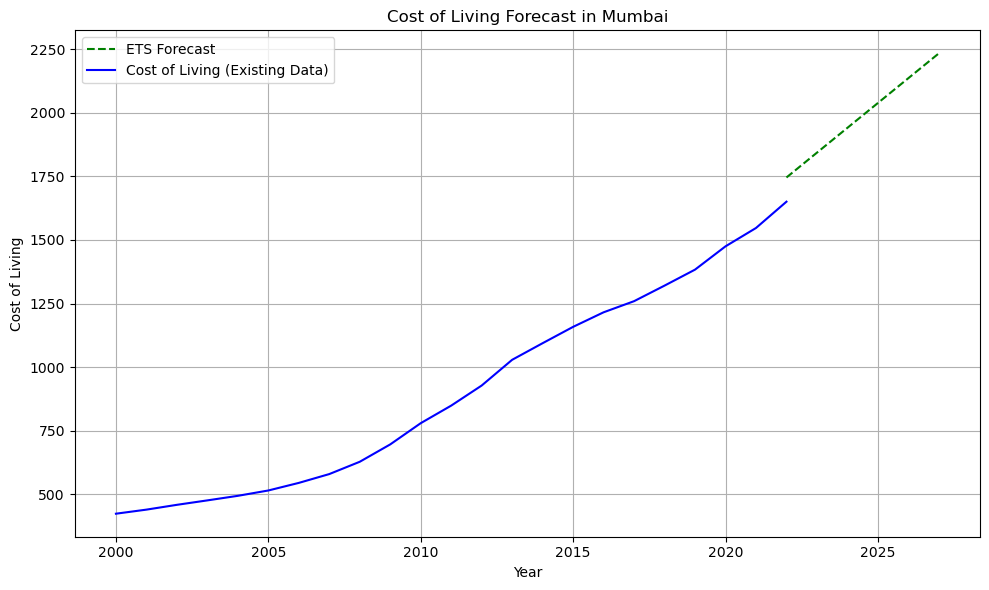

The predicted cost of living in Mumbai for the year 2027 is: 2233.71


In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Function to predict cost for a given city and year using ETS
def predict_cost_of_living_ets(city_data, city_name, prediction_year):
    model = ExponentialSmoothing(city_data[::-1], trend='additive')
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=prediction_year - 2022+1)  # Adjusted steps calculation
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(2022, prediction_year + 1), forecast, color='green', linestyle='--', label='ETS Forecast')  # Adjusted the range for forecast
    
    plt.plot(range(2000, 2000 + len(city_data)), city_data[::-1], label='Cost of Living (Existing Data)', color='blue')

    plt.title(f'Cost of Living Forecast in {city_name}')
    plt.xlabel('Year')
    plt.ylabel('Cost of Living')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return forecast[-1]


# Example usage
city_name = 'Mumbai'  # Assuming you have defined city_name
city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2022':'2000'].values.flatten()
prediction_year = 2027  # Replace with the year you want to predict
predicted_cost_ets = predict_cost_of_living_ets(city_data, city_name, prediction_year)
print(f"The predicted cost of living in {city_name} for the year {prediction_year} is: {predicted_cost_ets:.2f}")

## USING LSTM TO PLOT AND PREDICT THE COST OF LIVING(OUR OUTPUT) AND DISPLAYING IT

1/1 [==============================] - 1s 596ms/step


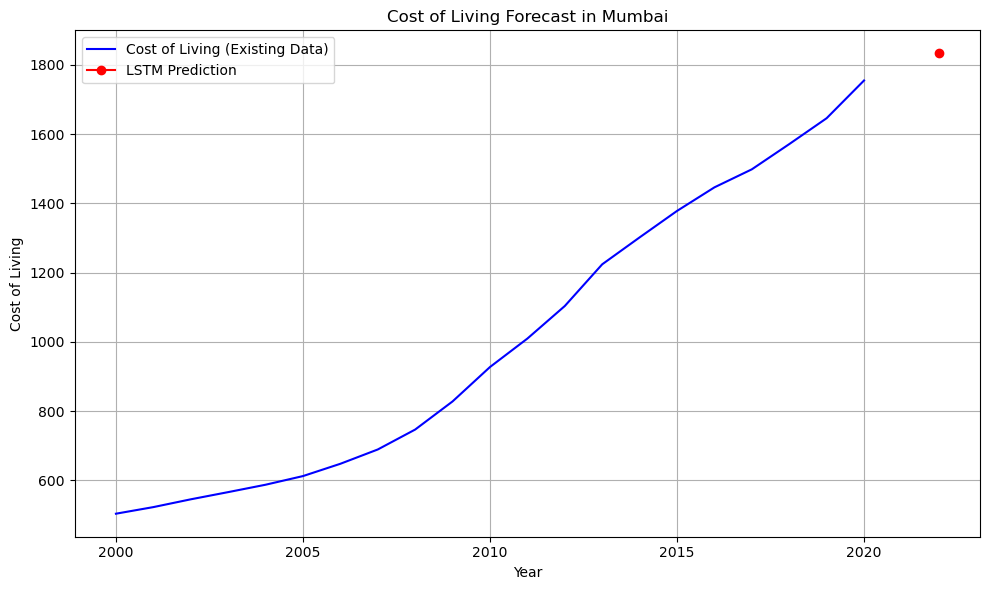

The predicted cost of living in Mumbai for the year 2022 is: 1833.27


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to create LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Function to predict cost for a given city and year using LSTM
def predict_cost_of_living_lstm(city_data, city_name, prediction_year):
    # Scale the data
    scaler = MinMaxScaler()
    city_data_scaled = scaler.fit_transform(city_data.reshape(-1, 1))

    # Reverse the order of data for prediction
    city_data_scaled_reversed = city_data_scaled[::-1]

    # Prepare the data for LSTM
    X = []
    y = []
    for i in range(len(city_data_scaled_reversed) - 1):
        X.append(city_data_scaled_reversed[i])
        y.append(city_data_scaled_reversed[i + 1])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], 1, 1))  # Reshape for LSTM input

    # Create and fit the LSTM model
    model = create_lstm_model()
    model.fit(X, y, epochs=100, batch_size=1, verbose=0)

    # Predict for the given year
    last_data_point = city_data_scaled_reversed[-1].reshape(1, 1, 1)
    prediction = model.predict(last_data_point)
    prediction = scaler.inverse_transform(prediction)[0][0]

    # Plotting the predictions
    plt.figure(figsize=(10, 6))
    plt.plot(range(2000, 2021), city_data[::-1], label='Cost of Living (Existing Data)', color='blue')  # Reverse order for plotting
    plt.plot(prediction_year, prediction, marker='o', color='red', label='LSTM Prediction')
    plt.title(f'Cost of Living Forecast in {city_name}')
    plt.xlabel('Year')
    plt.ylabel('Cost of Living')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Return the predicted cost for the specified year
    return prediction

# Example usage
city_name = 'Mumbai'
city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2020':'2000'].values.flatten()
prediction_year = 2022  # Replace with the year you want to predict
predicted_cost_lstm = predict_cost_of_living_lstm(city_data, city_name, prediction_year)
print(f"The predicted cost of living in {city_name} for the year {prediction_year} is: {predicted_cost_lstm:.2f}")


## USING SARIMA FUNCTION TO PLOT AND PREDICT THE COST OF LIVING(OUR OUTPUT) AND DISPLAYING IT

/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17418D+00    |proj g|=  2.10709D-01

At iterate    5    f=  3.11811D+00    |proj g|=  7.48439D-02

At iterate   10    f=  3.06189D+00    |proj g|=  3.85460D-02

At iterate   15    f=  3.05710D+00    |proj g|=  1.34965D-03

At iterate   20    f=  3.05595D+00    |proj g|=  5.30824D-03

At iterate   25    f=  3.05562D+00    |proj g|=  1.35647D-03

At iterate   30    f=  3.05547D+00    |proj g|=  5.62585D-04

At iterate   35    f=  3.05542D+00    |proj g|=  9.30371D-04

At iterate   40    f=  3.05540D+00    |proj g|=  2.09521D-04

At iterate   45    f=  3.05540D+00    |proj g|=  7.41007D-05

At iterate   50    f=  3.05540D+00    |proj g|=  3.79666D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

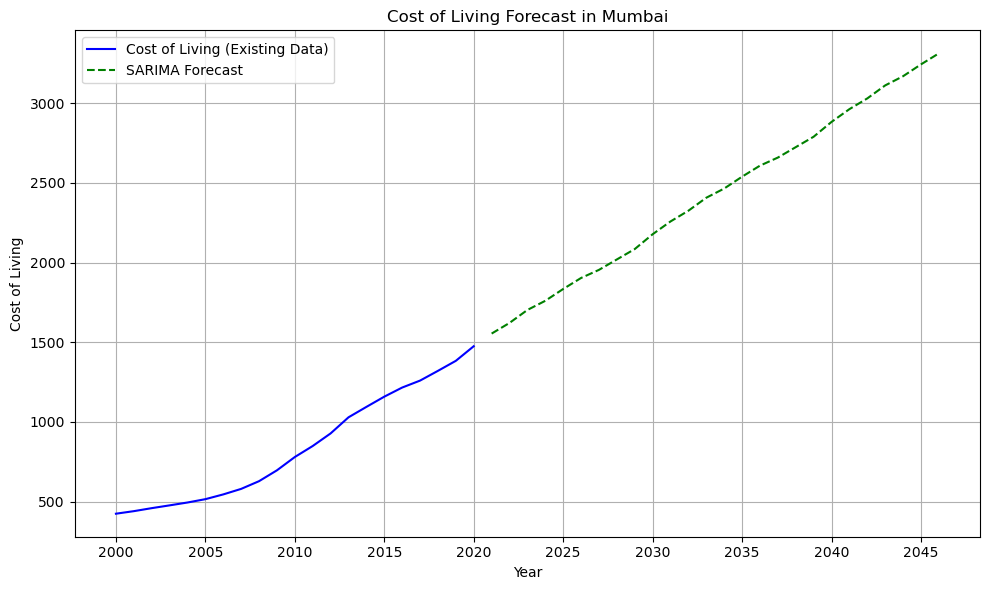

The predicted cost of living in Mumbai for the year 2045 is: 3313.57


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to predict cost for a given city and year using SARIMA
def predict_cost_of_living_sarima(city_data, city_name, prediction_year):
    # Create a range of years as index
    years_index = pd.date_range(start="1999", periods=len(city_data), freq='Y')

    # Convert city_data to a pandas Series with years as index
    city_data_series = pd.Series(city_data[::-1], index=years_index)

    # Fit SARIMA model
    model = SARIMAX(city_data_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))  
    model_fit = model.fit()

    # Forecast future values
    forecast = model_fit.forecast(steps=prediction_year - city_data_series.index[-1].year)

    # Plotting the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(city_data_series.index, city_data_series, label='Cost of Living (Existing Data)', color='blue')
    plt.plot(forecast.index, forecast, color='green', linestyle='--', label='SARIMA Forecast')

    plt.title(f'Cost of Living Forecast in {city_name}')
    plt.xlabel('Year')
    plt.ylabel('Cost of Living')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Return the forecasted cost for the specified year
    return forecast[-1]

# Example usage
city_name = 'Mumbai'
city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2020':'2000'].values.flatten()
prediction_year = 2045  # Replace with the year you want to predict
predicted_cost_sarima = predict_cost_of_living_sarima(city_data, city_name, prediction_year)
print(f"The predicted cost of living in {city_name} for the year {prediction_year} is: {predicted_cost_sarima:.2f}")


In [137]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

print('hrll')

# Function to predict cost for a given city and year using SARIMA
def predict_cost_of_living_sarima(city_data, city_name, prediction_year):
    # Create a range of years as index
    years_index = pd.date_range(end="2020", periods=len(city_data), freq='Y')

    # Convert city_data to a pandas Series with years as index
    city_data_series = pd.Series(city_data[::-1], index=years_index)

    # Fit SARIMA model
    model = SARIMAX(city_data_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))  # Example order, you may need to tune this
    model_fit = model.fit()

    # Forecast future values
    forecast_index = pd.date_range(start=years_index[-1], periods=prediction_year - city_data_series.index[-1].year, freq='Y')
    forecast = model_fit.forecast(steps=len(forecast_index))

    # Return the forecasted cost for the specified year
    return forecast[-1]

# Function to calculate percentage error
def calculate_percentage_error(actual, predicted):
    return abs((actual - predicted) / actual) * 100

# Example usage
prediction_year = 2022  # Replace with the year you want to predict

# Initialize lists to store percentage errors for each city
percentage_errors = []

# Iterate over each city and predict cost of living
for city_name in merged_df_7['city']:
    # Extract city data for the current city
    city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2020':'2005'].values.flatten()
    
    # Predict cost of living for the current city
    predicted_cost_sarima = predict_cost_of_living_sarima(city_data, city_name, prediction_year)
    
    # Extract the actual cost of living for the year 2022
    actual_value = merged_df_7.loc[merged_df_7['city'] == city_name, '2022'].values[0]
    
    # Calculate the percentage error for the current city
    percentage_error = calculate_percentage_error(actual_value, predicted_cost_sarima)
    
    # Append the percentage error to the list
    percentage_errors.append(percentage_error)
    
    # Print the predicted cost of living for the current city
    print(f"The predicted cost of living in {city_name} for the year {prediction_year} is: {predicted_cost_sarima:.2f}")

# Calculate the overall accuracy
overall_accuracy = 100 - np.mean(percentage_errors)
print(f"\nOverall Accuracy: {overall_accuracy:.2f}%")

KeyboardInterrupt: 

## USING ARIMA FUNCTION TO PLOT AND PREDICT THE COST OF LIVING(OUR OUTPUT) AND DISPLAYING IT

/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


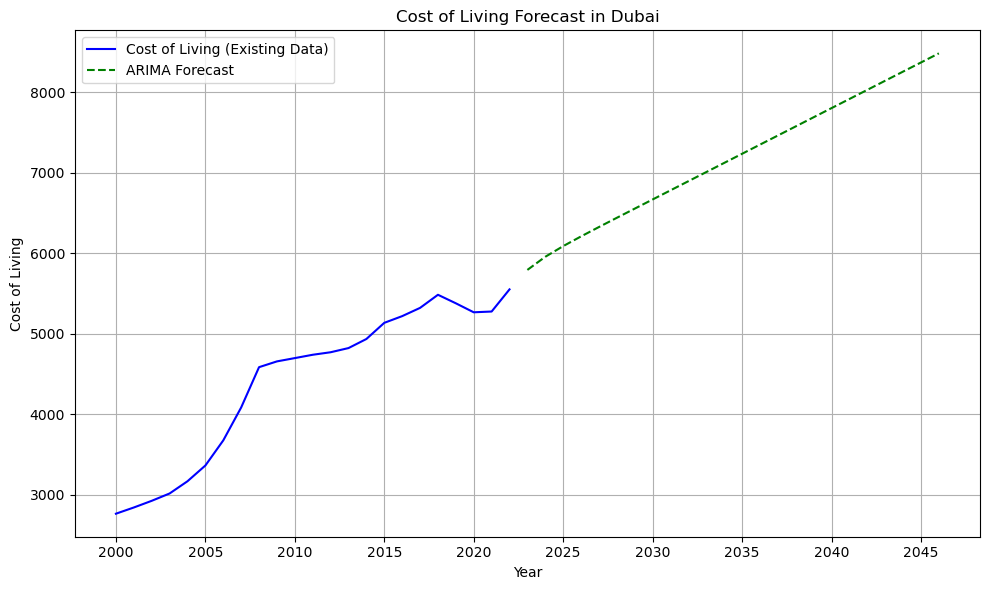

The predicted cost of living in Dubai for the year 2045 is: 8483.38


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Function to predict cost for a given city and year using ARIMA
def predict_cost_of_living_arima(city_data, city_name, prediction_year):
    # Create a range of years as index
    years_index = pd.date_range(start="1999", periods=len(city_data), freq='Y')

    # Convert city_data to a pandas Series with years as index
    city_data_series = pd.Series(city_data[::-1], index=years_index)

    # Fit ARIMA model
    model = ARIMA(city_data_series, order=(2,1,2))  # Example order, you may need to tune this
    model_fit = model.fit()

    # Forecast future values
    forecast = model_fit.forecast(steps=prediction_year - city_data_series.index[-1].year)

    # Plotting the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(city_data_series.index, city_data_series, label='Cost of Living (Existing Data)', color='blue')
    plt.plot(forecast.index, forecast, color='green', linestyle='--', label='ARIMA Forecast')

    plt.title(f'Cost of Living Forecast in {city_name}')
    plt.xlabel('Year')
    plt.ylabel('Cost of Living')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Return the forecasted cost for the specified year
    return forecast[-1]

# Example usage
city_name = 'Dubai'
city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2022':'2000'].values.flatten()
prediction_year = 2045  # Replace with the year you want to predict
predicted_cost_arima = predict_cost_of_living_arima(city_data, city_name, prediction_year)
print(f"The predicted cost of living in {city_name} for the year {prediction_year} is: {predicted_cost_arima:.2f}")


## USING POLYNOMIAL REGRESSION FUNCTION TO PLOT AND PREDICT THE COST OF LIVING(OUR OUTPUT) AND DISPLAYING IT

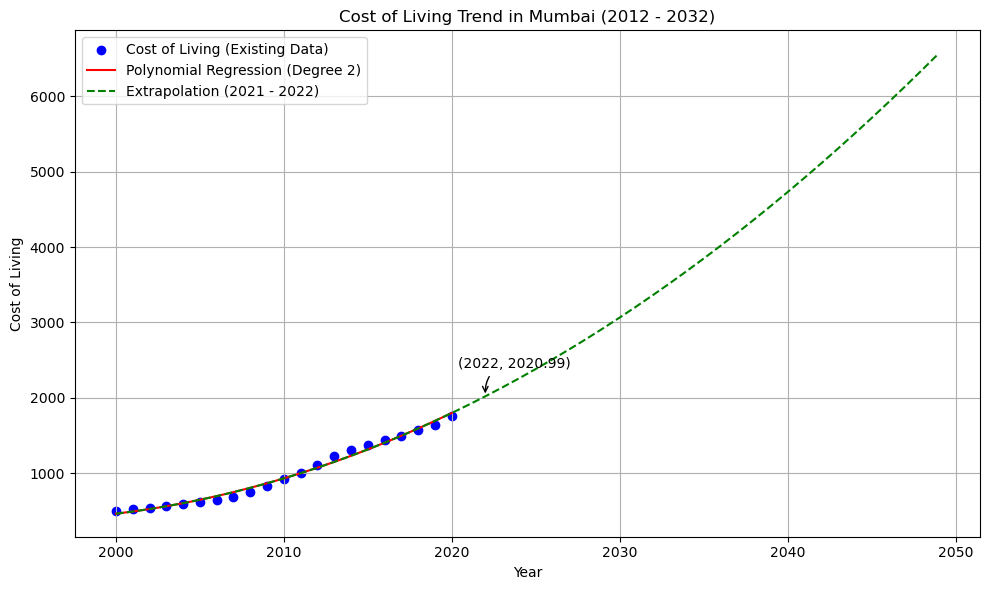

The slope at 2022 for Mumbai is: 114.64
The predicted cost of living range in Mumbai for the year 2022 is: 1919.95 to 2122.04$


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Function to predict cost for a given city and year
def predict_cost_of_living(years, city_data, city_name, prediction_year):
    coefficients = np.polyfit(years, city_data, 2)
    poly_function = np.poly1d(coefficients)

    # Plotting the polynomial curve
    plt.figure(figsize=(10, 6))
    plt.scatter(years, city_data, label='Cost of Living (Existing Data)', color='blue')
    plt.plot(years, poly_function(years), color='red', label='Polynomial Regression (Degree 2)')

    # Extending the curve to predict values for future years
    future_years = np.arange(2000, 2050)
    predicted_values = poly_function(future_years)
    plt.plot(future_years, predicted_values, color='green', linestyle='--', label=f'Extrapolation ({max(years) + 1} - {prediction_year})')

    plt.title(f'Cost of Living Trend in {city_name} (2012 - {prediction_year + 10})')
    plt.xlabel('Year')
    plt.ylabel('Cost of Living')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Annotation for a specific year
    x_annotation = prediction_year
    y_annotation = poly_function(x_annotation)
    plt.annotate(f'({x_annotation}, {y_annotation:.2f})', (x_annotation, y_annotation),
                 xytext=(-20, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

    plt.show()

    # Calculate the derivative of the polynomial function
    derivative_function = np.polyder(poly_function)

    # Calculate the slope (derivative) at the given prediction year
    slope_at_prediction_year = derivative_function(prediction_year)
    print(f"The slope at {prediction_year} for {city_name} is: {slope_at_prediction_year:.2f}")

    # Return the predicted cost for the specified year
    return poly_function(prediction_year)

# # Sample data (Replace with actual data)
# years = list(range(2010, 2000, -1)) # Replace with actual years data
# city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2010':'2000'].values.flatten() # Replace with actual cost data
# #city_name = 'Mumbai'

# # Example usage
# #prediction_year = 2034  # Replace with the year you want to predict
# predicted_cost = predict_cost_of_living(years, city_data, city_name, prediction_year)
# print(f"The predicted cost of living in {city_name} for the year {prediction_year} is: {predicted_cost:.2f}")

city_name = 'Mumbai'
#years = np.array([2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000])  # Ensure this array has the correct length
years = list(range(2020, 1999, -1))
city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2020':'2000'].values.flatten()
prediction_year = 2022  # Replace with the year you want to predict
predicted_cost = predict_cost_of_living(years, city_data, city_name, prediction_year)
lower_bound = predicted_cost - 0.05 * predicted_cost
upper_bound = predicted_cost + 0.05 * predicted_cost
#print(f"The predicted cost of living range in {city_name} for the year {prediction_year} is: {predicted_cost:.2f}")
print(f"The predicted cost of living range in {city_name} for the year {prediction_year} is: {lower_bound:.2f} to {upper_bound:.2f}$")


## USING ENSEMBLED MEAN

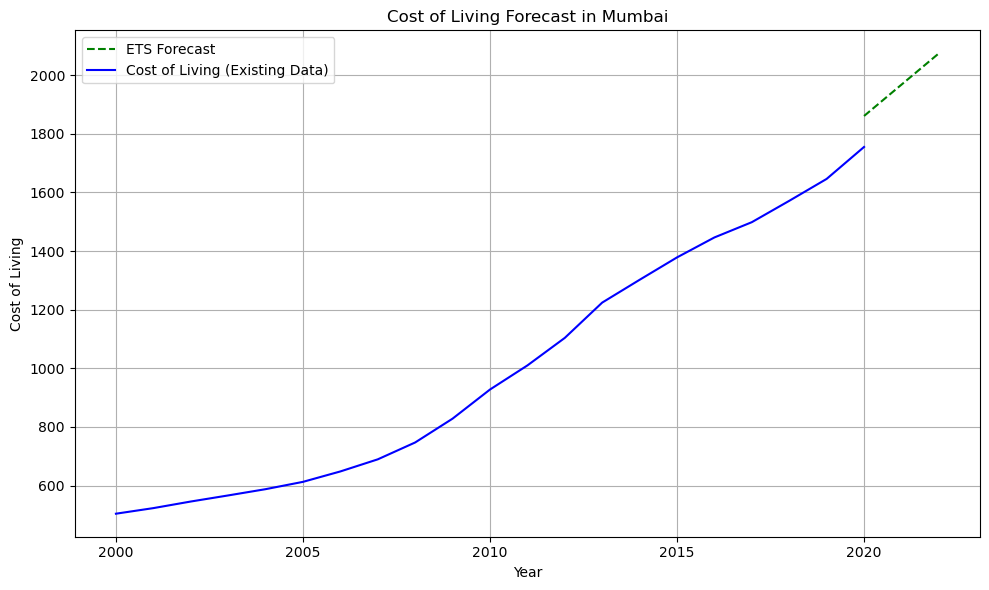

/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29845D+00    |proj g|=  2.10897D-01

At iterate    5    f=  3.24564D+00    |proj g|=  7.01306D-02

At iterate   10    f=  3.20174D+00    |proj g|=  3.21936D-02

At iterate   15    f=  3.18082D+00    |proj g|=  1.37497D-03

At iterate   20    f=  3.18020D+00    |proj g|=  2.14742D-03

At iterate   25    f=  3.17986D+00    |proj g|=  8.05865D-04

At iterate   30    f=  3.17969D+00    |proj g|=  1.25106D-03

At iterate   35    f=  3.17963D+00    |proj g|=  6.33473D-04

At iterate   40    f=  3.17963D+00    |proj g|=  1.28698D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

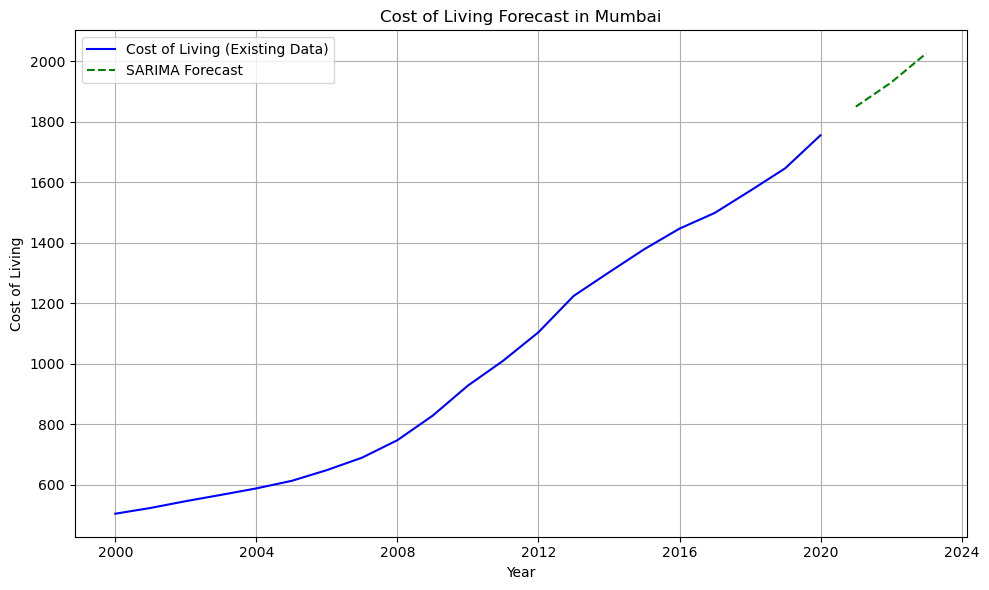

The ensemble predicted cost of living in Mumbai for the year 2022 is: 2050.10


In [51]:
# Ensemble the predictions using simple averaging
def ensemble_predictions(predictions):
    # Compute the average prediction
    ensemble_prediction = np.mean(predictions, axis=0)
    return ensemble_prediction

# Example usage
#city_name = 'Mumbai'
city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2020':'2000'].values.flatten()
#prediction_year = 2030

# Get predictions from each model
predicted_cost_ets = predict_cost_of_living_ets(city_data, city_name, prediction_year)
#predicted_cost_lstm = predict_cost_of_living_lstm(city_data, city_name, prediction_year)
predicted_cost_sarima = predict_cost_of_living_sarima(city_data, city_name, prediction_year)
#predicted_cost_arima = predict_cost_of_living_arima(city_data, city_name, prediction_year)
#predicted_cost_poly = predict_cost_of_living(years, city_data, city_name, prediction_year)

# Ensemble predictions
#predictions = np.array([predicted_cost_ets, predicted_cost_lstm, predicted_cost_sarima, predicted_cost_arima, predicted_cost_poly])
#predictions = np.array([predicted_cost_arima, predicted_cost_ets, predicted_cost_lstm, predicted_cost_sarima])
#predictions = np.array([predicted_cost_ets, predicted_cost_arima, predicted_cost_sarima])
predictions = np.array([predicted_cost_ets, predicted_cost_sarima])

ensemble_prediction = ensemble_predictions(predictions)

print(f"The ensemble predicted cost of living in {city_name} for the year {prediction_year} is: {ensemble_prediction:.2f}")


In [39]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to predict cost for a given city and year using ARIMA
def predict_cost_of_living_arima(city_data, city_name, prediction_year):
    # Ensure the data is float type
    city_data = city_data.astype(float)

    # Create a range of years as index
    years_index = pd.date_range(end="2020", periods=len(city_data), freq='Y')

    # Convert city_data to a pandas Series with years as index
    city_data_series = pd.Series(city_data[::-1], index=years_index)

    # Fit ARIMA model
    model = ARIMA(city_data_series, order=(1, 1, 1))  # Example order, you may need to tune this
    model_fit = model.fit()

    # Forecast future values
    forecast_index = pd.date_range(start=years_index[-1], periods=prediction_year - city_data_series.index[-1].year, freq='Y')
    forecast = model_fit.forecast(steps=len(forecast_index))

    # Return the forecasted cost for the specified year
    return forecast[-1]

# Function to predict cost for a given city and year using exponential smoothing
def predict_cost_of_living_exp_smooth(city_data, city_name, prediction_year):
    # Create a range of years as index
    years_index = pd.date_range(end="2020", periods=len(city_data), freq='Y')

    # Convert city_data to a pandas Series with years as index
    city_data_series = pd.Series(city_data[::-1], index=years_index)

    # Fit exponential smoothing model
    model = ExponentialSmoothing(city_data_series)
    model_fit = model.fit()

    # Forecast future values
    forecast = model_fit.forecast(steps=prediction_year - city_data_series.index[-1].year)

    # Return the forecasted cost for the specified year
    return forecast[-1]

# Function to predict cost for a given city and year using SARIMA
def predict_cost_of_living_sarima(city_data, city_name, prediction_year):
    # Create a range of years as index
    years_index = pd.date_range(start="1999", periods=len(city_data), freq='Y')

    # Convert city_data to a pandas Series with years as index
    city_data_series = pd.Series(city_data[::-1], index=years_index)

    # Fit SARIMA model
    model = SARIMAX(city_data_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))  # Example order, you may need to tune this
    model_fit = model.fit()

    # Forecast future values
    forecast = model_fit.forecast(steps=prediction_year - city_data_series.index[-1].year)

    # Return the forecasted cost for the specified year
    return forecast[-1]

# Function to calculate percentage error
def calculate_percentage_error(actual, predicted):
    return abs((actual - predicted) / actual) * 100

# Function to perform ensemble learning testing with exponential smoothing and SARIMA
def ensemble_learning_exp_sarima(city_data, city_name, prediction_year):
    try:
        # Predict cost of living for the current city using exponential smoothing
        model_exp_smooth = ExponentialSmoothing(city_data)
        model_exp_smooth_fit = model_exp_smooth.fit()
        predicted_cost_exp_smooth = model_exp_smooth_fit.forecast(steps=prediction_year - city_data.index[-1].year)[-1]

        # Predict cost of living for the current city using SARIMA
        predicted_cost_sarima = predict_cost_of_living_sarima(city_data, city_name, prediction_year)

        # Ensemble prediction: Simple average
        ensemble_prediction = (predicted_cost_exp_smooth + predicted_cost_sarima) / 2

        return ensemble_prediction

    except Exception as e:
        print(f"Error in ensemble prediction for {city_name}: {e}")
        return None

# Example usage
prediction_year = 2022  # Replace with the year you want to predict
percentage_errors = []

for city_name in merged_df_7['city']:
    city_data = merged_df_7.loc[merged_df_7['city'] == city_name, '2005':'2000'].values.flatten()

    try:
        ensemble_prediction = ensemble_learning_exp_sarima(city_data, city_name, prediction_year)

        if ensemble_prediction is not None:
            actual_value = merged_df_7.loc[merged_df_7['city'] == city_name, '2022'].values[0]
            percentage_error = calculate_percentage_error(actual_value, ensemble_prediction)
            percentage_errors.append(percentage_error)

            print(f"The predicted cost of living in {city_name} for the year {prediction_year} using ensemble learning is: {ensemble_prediction:.2f}")

    except ValueError as ve:
        print(ve)

overall_accuracy = 100 - np.mean(percentage_errors)
print(f"\nOverall Accuracy: {overall_accuracy:.2f}%")


Error in ensemble prediction for Herat: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Kabul: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Kruje: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Gjirokaster: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Gramsh: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Berat: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Tirana: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Lushnje: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Korce: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Vlore: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Fier: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble predi

Error in ensemble prediction for Cachoeiro de Itapemirim: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Cuiaba: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Barueri: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Cascavel: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Mogi das Cruzes: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Campinas: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Sinop: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Governador Valadares: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Itu: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Caruaru: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Maringa: 'numpy.ndarray' object has

Error in ensemble prediction for Ruse: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Ouagadougou: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Bujumbura: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Kampong Cham: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Siem Reap: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Kampot: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Sihanoukville: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Battambang: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Phnom Penh: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Yaounde: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Bamenda: 'numpy.ndarray' object has no attribu

Error in ensemble prediction for Dongguan: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Sanya: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Jinan: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Wuhan: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Chengdu: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Cangzhou: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Shenyang: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Zibo: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Xi'an: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Zhanjiang: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Nantong: 'numpy.ndarray' object has no attribute 'index'
Error in ensembl

Error in ensemble prediction for Odense: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Vejle: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Aarhus: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Hillerod: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Aalborg: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Roskilde: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Djibouti: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Roseau: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Bonao: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for La Romana: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for San Francisco de Macoris: 'numpy.ndarray' object has no attribute 'in

Error in ensemble prediction for Dusseldorf: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Gelsenkirchen: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Aschaffenburg: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Stuttgart: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Greifswald: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Fulda: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Russelsheim: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Bruchsal: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Regensburg: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Chemnitz: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Paderborn: 'numpy.ndarray' object has no

Error in ensemble prediction for Patna: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Begusarai: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Ahmedabad: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Haldia: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Rajkot: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Vadodara: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Aurangabad: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Tirupati: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Surat: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Sonipat: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Cherukuru: 'numpy.ndarray' object has no attribute 'index'
Error

Error in ensemble prediction for Mosul: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for As Sulaymaniyah: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for An Najaf: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Baghdad: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Erbil: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Al Basrah: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Kirkuk: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Al Kufah: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Ad Diwaniyah: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Dahuk: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Ar Ramadi: 'numpy.ndarray' object has no attribute 'index

Error in ensemble prediction for Ascoli Piceno: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Trento: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Ferrara: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Alghero: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Novara: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Ancona: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Gorizia: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Cagliari: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Cantu: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Rieti: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Reggio di Calabria: 'numpy.ndarray' object has no attribute 'index'

Error in ensemble prediction for Nur-Sultan: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Ekibastuz: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Oral: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Qostanay: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Almaty: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Semey: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Atyrau: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Pavlodar: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Aqtobe: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Taraz: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Oskemen: 'numpy.ndarray' object has no attribute 'index'
Error in ense

Error in ensemble prediction for Siggiewi: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Qormi: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Hamrun: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Valletta: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Birzebbuga: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Zabbar: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for San Gwann: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Zurrieq: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Mosta: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Imsida: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Majuro: 'numpy.ndarray' object has no attribute 'index'
Error in en

Error in ensemble prediction for Gouda: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Rotterdam: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Groningen: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Amstelveen: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Den Helder: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Leiden: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Rijswijk: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Nijmegen: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for 's-Hertogenbosch: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Bergen op Zoom: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Breda: 'numpy.ndarray' object has no attri

Error in ensemble prediction for Islamabad: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Santiago: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Las Tablas: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for David: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Panama City: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Port Moresby: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Ciudad del Este: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Asuncion: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for San Lorenzo: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Cajamarca: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Huancayo: 'numpy.ndarray' object has no

Error in ensemble prediction for Drobeta-Turnu Severin: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Resita: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Kigali: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Apia: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Domagnano: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for San Marino: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Jeddah: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Mecca: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Al Qatif: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Al Mubarraz: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Yanbu`: 'numpy.ndarray' object has no attribute 'in

Error in ensemble prediction for Palomares del Rio: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Murcia: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Vitoria-Gasteiz: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Manresa: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for A Coruna: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Villagarcia de Arosa: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Novelda: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Salamanca: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Gijon: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Plasencia: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Almunecar: 'numpy.ndarray' object 

Error in ensemble prediction for Visby: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Skelleftea: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Vaxjo: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Sundsvall: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Munchwilen: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Visp: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Baden: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for La Chaux-de-Fonds: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Glarus: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Bellinzona: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Langenthal: 'numpy.ndarray' object has no attribute 'ind

Error in ensemble prediction for Adiyaman: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Konya: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Yalova: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Gaziantep: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Nigde: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Edirne: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Giresun: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Osmaniye: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Ordu: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Erzurum: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Malatya: 'numpy.ndarray' object has no attribute 'index'
Error in ensemb

Error in ensemble prediction for Leicester: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Middlesbrough: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Canterbury: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Colchester: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Exeter: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Basingstoke: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Burnley: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Glasgow: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Wolverhampton: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Cambridge: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for High Wycombe: 'numpy.ndarray' object has n

Error in ensemble prediction for Tacoma: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Point Pleasant: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Boca Raton: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Amarillo: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Gulfport: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Beaverton: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Hermosa Beach: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for New Smyrna Beach: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Bremerton: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Appleton: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Morristown: 'numpy.ndarray' object h

Error in ensemble prediction for New Haven: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Columbia: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Baton Rouge: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Colorado Springs: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Charleston: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Westgate: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Springfield: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Grand Rapids: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Albany: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Knoxville: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Mission Viejo: 'numpy.ndarray' object

Error in ensemble prediction for Farmington Hills: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Williamsburg: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Schaumburg: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Pocatello: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Casper: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Ankeny: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Saratoga Springs: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Ames: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Juneau: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Rockville: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Rogers: 'numpy.ndarray' object has no attri

Error in ensemble prediction for Norman: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Stevens Point: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Kenosha: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Jeffersonville: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Simi Valley: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Fort Smith: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Auburn: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Atlantida: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Rivera: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Tacuarembo: 'numpy.ndarray' object has no attribute 'index'
Error in ensemble prediction for Las Piedras: 'numpy.ndarray' object has no at

/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


## TRYING FOR COMPLETE DATASET

In [118]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# import pandas as pd
# import numpy as np

# # Function to predict cost for a given city and year using ETS
# def predict_cost_of_living_ets(city_data, prediction_year):
#     model = ExponentialSmoothing(city_data[::-1], trend='add')
#     model_fit = model.fit()
#     forecast = model_fit.forecast(steps=prediction_year - 2020 + 1)  # Adjusted steps calculation
#     return forecast[-1]

# # Function to calculate Mean Absolute Percentage Error (MAPE) for each city
# def calculate_mape_for_city(actual, predicted):
#     return np.abs((actual - predicted) / actual) * 100

# # Example usage
# def forecast_for_all_cities(df, prediction_year):
#     predicted_values = []
#     actual_values = []
#     mapes = []
#     for index, row in df.iterrows():
#         city_name = row['city']
#         country = row['country']
#         city_data = df[(df['city'] == city_name) & (df['country'] == country)].loc[:, '2020':'2000'].values.flatten()
#         actual_value = row[str(prediction_year)]  # Actual value in the year 2022
#         predicted_cost_ets = predict_cost_of_living_ets(city_data, prediction_year)
#         predicted_values.append(predicted_cost_ets)
#         actual_values.append(actual_value)
#         mape = calculate_mape_for_city(actual_value, predicted_cost_ets)
#         mapes.append(mape)

#     df['Pred_2022(2000-20)'] = predicted_values
#     df['MAPE'] = mapes
#     return df

# prediction_year = 2022
# merged_df_7_with_predictions_3 = forecast_for_all_cities(merged_df_7, prediction_year)
# merged_df_7_with_predictions_3

from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import numpy as np

# Function to predict cost for a given city and year using ETS
def predict_cost_of_living_ets(city_data, prediction_year):
    model = ExponentialSmoothing(city_data[::-1], trend='add')
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=prediction_year - 2020 + 1)  # Adjusted steps calculation
    return forecast[-1]

# Function to calculate Mean Absolute Percentage Error (MAPE) for each city
def calculate_mape_for_city(actual, predicted):
    return np.abs((actual - predicted) / actual) * 100

# Example usage
def forecast_for_all_cities(df, prediction_year, test_cases):
    for train_duration in test_cases:
        train_start_year, train_end_year = train_duration
        predicted_values = []
        mapes = []
        for index, row in df.iterrows():
            city_name = row['city']
            country = row['country']
            city_data = df[(df['city'] == city_name) & (df['country'] == country)].loc[:, str(train_end_year):str(train_start_year)].values.flatten()
            if len(city_data) == 0:
                continue
            actual_value = row[str(prediction_year)]  # Actual value in the year 2022
            predicted_cost_ets = predict_cost_of_living_ets(city_data, prediction_year)
            predicted_values.append(predicted_cost_ets)
            mape = calculate_mape_for_city(actual_value, predicted_cost_ets)
            mapes.append(mape)

        # Add a new column for predicted values and MAPEs for this test case
        df[f'Pred_{train_start_year}-{train_end_year}'] = predicted_values
        df[f'MAPE_{train_start_year}-{train_end_year}'] = mapes
    
    return df

# Define the test cases (train durations)
test_cases = [
    (2015, 2020),
    (2010, 2020),
    (2005, 2020),
    (2000, 2020),
    (2010, 2015),
    (2005, 2015),
    (2000, 2015),
    (2005, 2010),
    (2000, 2010),
    (2000, 2005)
]

prediction_year = 2022
merged_df_7_with_predictions_3 = forecast_for_all_cities(merged_df_7, prediction_year, test_cases)
merged_df_7_with_predictions_3


,city,country,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,Pred_2022(2000-20),MAPE,Pred_2015-2020,MAPE_2015-2020,Pred_2010-2020,MAPE_2010-2020,Pred_2005-2020,MAPE_2005-2020,Pred_2000-2020,MAPE_2000-2020,Pred_2010-2015,MAPE_2010-2015,Pred_2005-2015,MAPE_2005-2015,Pred_2000-2015,MAPE_2000-2015,Pred_2005-2010,MAPE_2005-2010,Pred_2000-2010,MAPE_2000-2010,Pred_2000-2005,MAPE_2000-2005
0,Herat,Afghanistan,721.822333,672.657207,640.260048,607.226905,593.574687,589.858578,561.877098,538.299577,541.875958,517.699396,482.074119,452.906914,405.104574,396.461709,425.433747,336.524084,309.646746,289.985715,262.264371,225.390487,166.143659,109.355400,193.207420,694.603189,3.770892,690.591123,4.326717,705.841689,2.213930,690.346098,4.360662,694.603189,3.770892,641.854106,11.078658,636.643853,11.800477,650.274979,9.912045,505.875192,29.916938,520.351895,27.911361,365.160478,49.411308
1,Kabul,Afghanistan,562.910167,524.568946,499.304155,473.543395,462.896769,459.998777,438.177535,419.790703,422.579729,403.725737,375.943511,353.197587,315.919130,309.179027,331.772751,262.436918,241.476737,226.144163,204.525787,175.769841,129.566446,85.280357,150.672009,541.683570,3.770868,538.554545,4.326733,550.447991,2.213884,538.363527,4.360667,541.683570,3.770868,500.547280,11.078657,496.478308,11.801503,507.132226,9.908853,394.504955,29.916889,405.804011,27.909632,284.769228,49.411248
2,Kruje,Albania,771.218500,722.588307,708.142206,696.853184,687.164170,673.492276,660.351286,651.941244,639.722543,629.524250,617.604484,605.316558,585.355921,565.179029,552.526180,534.306334,519.197681,506.979476,495.290617,481.659649,470.462639,447.292868,433.843713,749.287046,2.843741,743.171692,3.636688,744.848045,3.419323,742.670510,3.701673,749.287046,2.843741,691.987610,10.273469,695.429668,9.827154,695.560752,9.810157,630.045636,18.305171,625.062864,18.951262,554.439016,28.108699
3,Gjirokaster,Albania,916.030167,858.268684,841.110039,827.701279,816.192958,799.953894,784.345420,774.356225,759.843219,747.729993,733.572053,718.976823,695.268178,671.302673,656.273998,634.633013,616.687409,602.174992,588.291317,572.100862,558.801389,531.281032,515.306529,889.980634,2.843742,882.717119,3.636676,884.708133,3.419323,882.121756,3.701670,889.980634,2.843742,821.921732,10.273508,826.010466,9.827155,826.166170,9.810157,748.349163,18.305184,742.430888,18.951262,658.546006,28.108699
4,Gramsh,Albania,930.379278,871.712993,854.285568,840.666766,828.978174,812.484734,796.631762,786.486091,771.745747,759.442774,745.063057,730.239202,706.159174,681.818262,666.554171,644.574191,626.347480,611.607733,597.506578,581.062509,567.554707,539.603258,523.378524,903.921715,2.843739,896.544176,3.636700,898.566602,3.419323,895.939707,3.701670,903.921715,2.843739,834.796932,10.273482,838.949471,9.827154,839.107607,9.810157,760.071598,18.305188,754.060664,18.951262,668.861769,28.108699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,Kafue,Zambia,3269.563833,2945.818392,2414.209467,2086.070567,1899.882119,1767.496622,1658.375514,1407.072386,1277.878835,1185.196471,1107.763783,1039.275526,976.395646,899.903821,793.705963,705.892888,638.008756,585.007112,494.511506,419.219656,345.577163,282.565137,233.062634,3197.987204,2.189180,2885.937584,11.733255,3219.816249,1.521536,3212.529212,1.744411,3197.987204,2.189180,1794.652855,45.110328,1610.569573,50.740537,1641.874319,49.783078,1205.871144,63.118287,1199.402737,63.316124,856.493928,73.804031
3112,Chitungwiza,Zimbabwe,1187.608667,308.517864,155.385477,23.643200,6.654620,6.016292,5.962037,6.057134,6.206716,6.219778,6.120021,5.900522,5.702640,5.533858,5.209808,2.027478,7.434830,5.591359,8.164951,3.823080,4.180971,6.377320,10.154968,550.607023,53.637335,550.221922,53.669762,550.428879,53.652336,550.612295,53.636891,550.607023,53.637335,5.60838

## EXPORTING(NOT TO USE)

In [ ]:
# import os
# current_directory = os.getcwd()

In [ ]:
# current_directory

In [ ]:
# file_name = 'dataset_india1.xlsx'
# file_path = os.path.join(current_directory, file_name)

In [ ]:
# pip install openpyxl

In [ ]:
# df_try1.to_excel(file_path, index=False, engine='openpyxl')

In [ ]:
#df_try1.to_excel(file_path)